Zkouška technologie
===================
Toto je zkušební poznámkový blok, na kterém chci zjistit, zdali nám tahle technologie bude vyhovovat.
Grafy se zatím pouze zobrazují, ale neukládají do souborů, které by bylo možno importovat v LaTeXu.
Kromě toho jsou docela hnusné. Pro účely tisku se je asi pokusím vytvořit Gnuplotem.

Naměřená data
-------------
Zde jsou grafy naměřených dat. Kvůli přehlednosti jsou reálné a imaginární složky v samostatných grafech.
Bohužel se mi zatím nepodařilo přesvědčit Jupyter, aby zobrazoval jednotlivé grafy ve správném pořadí.


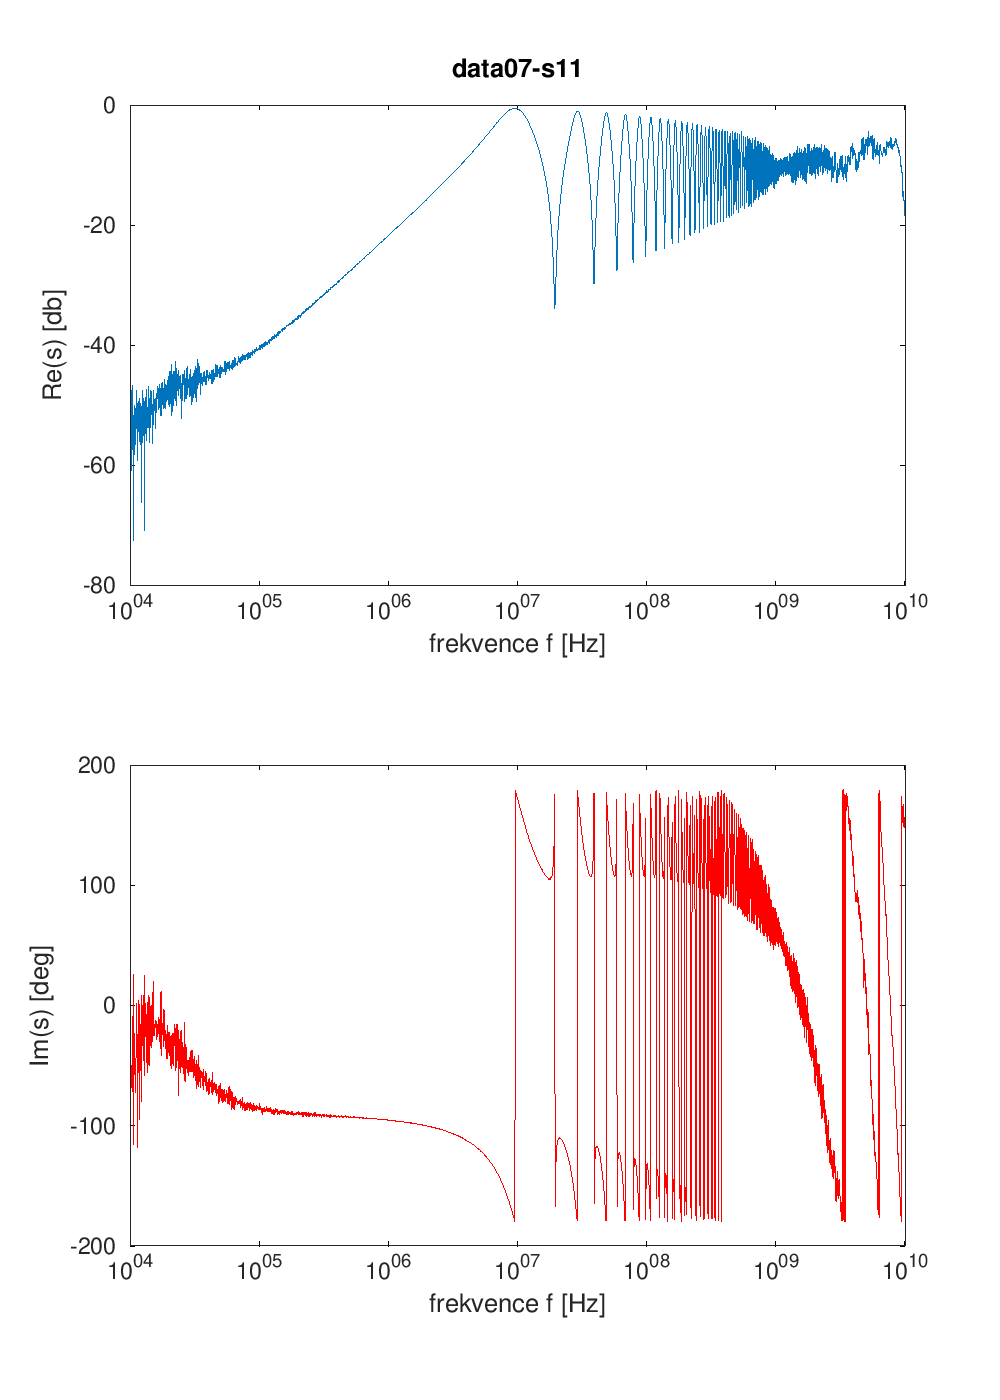

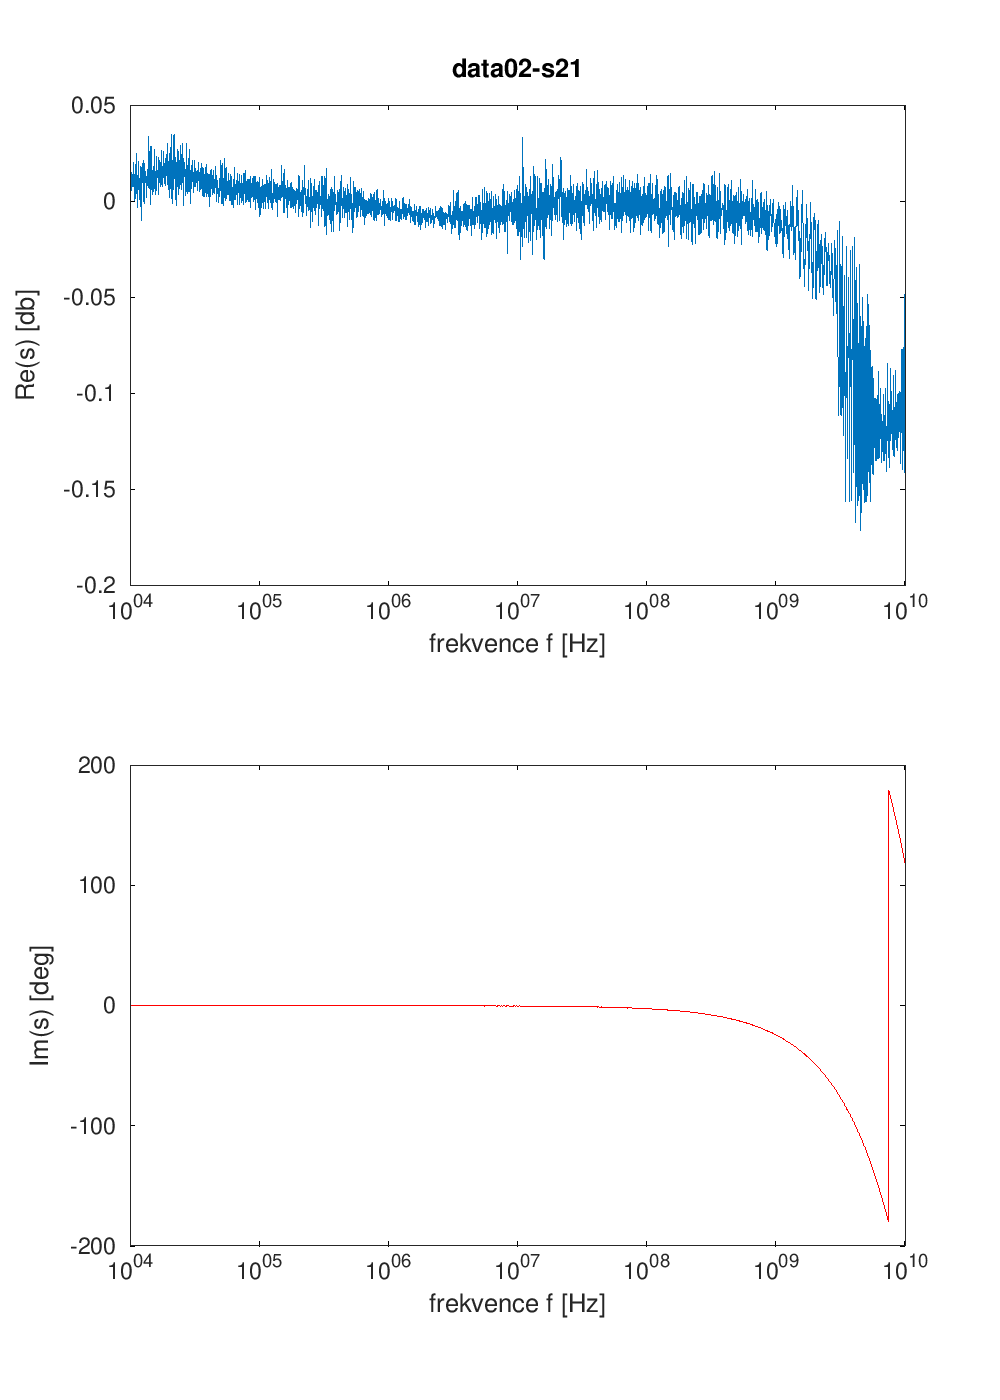

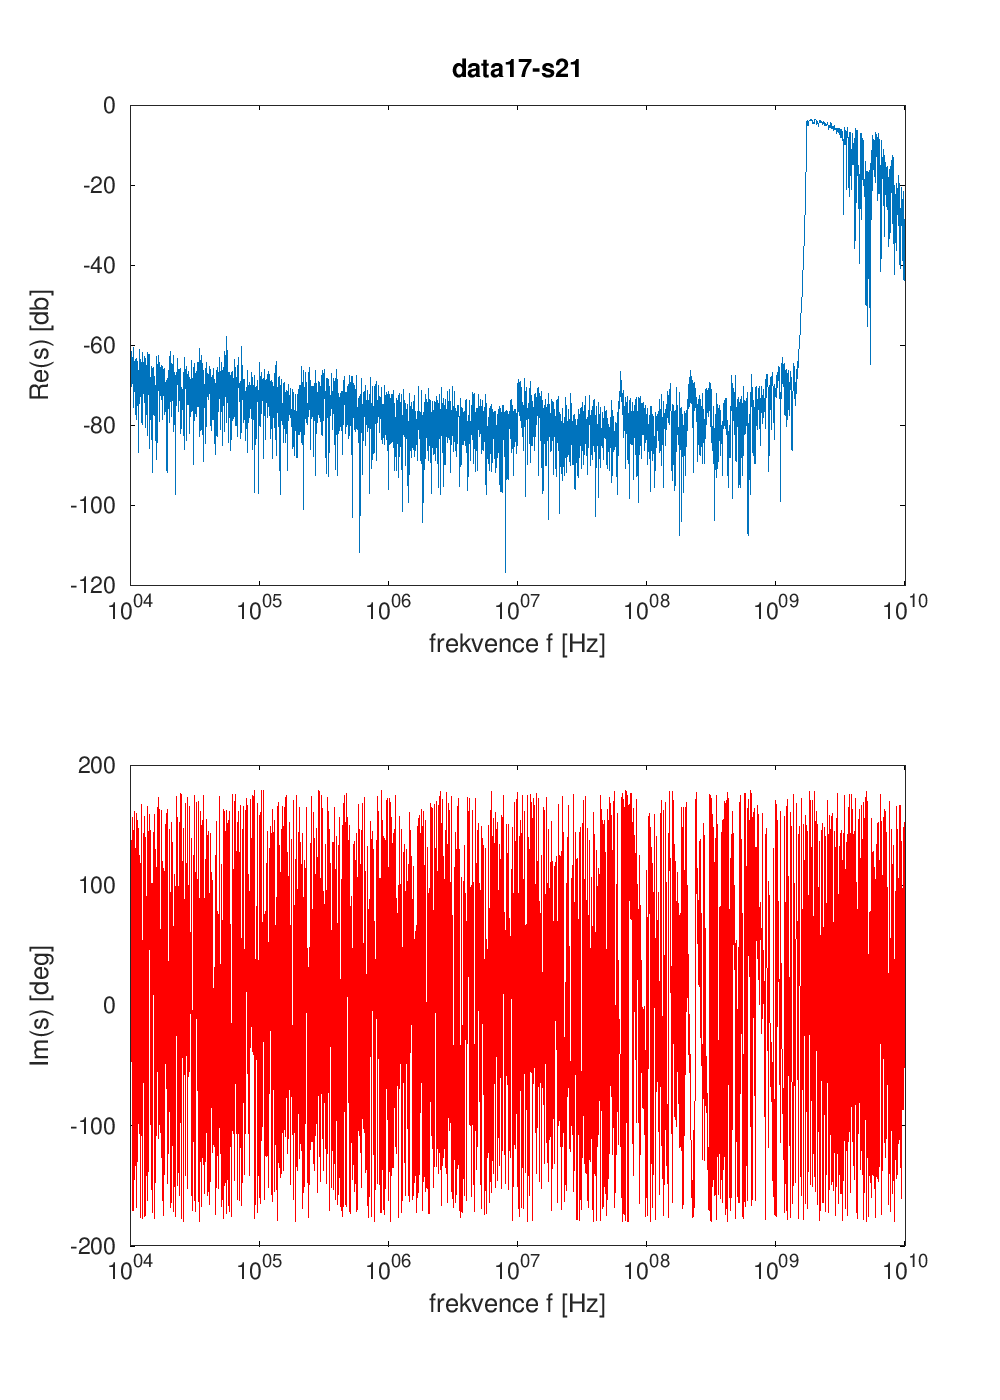

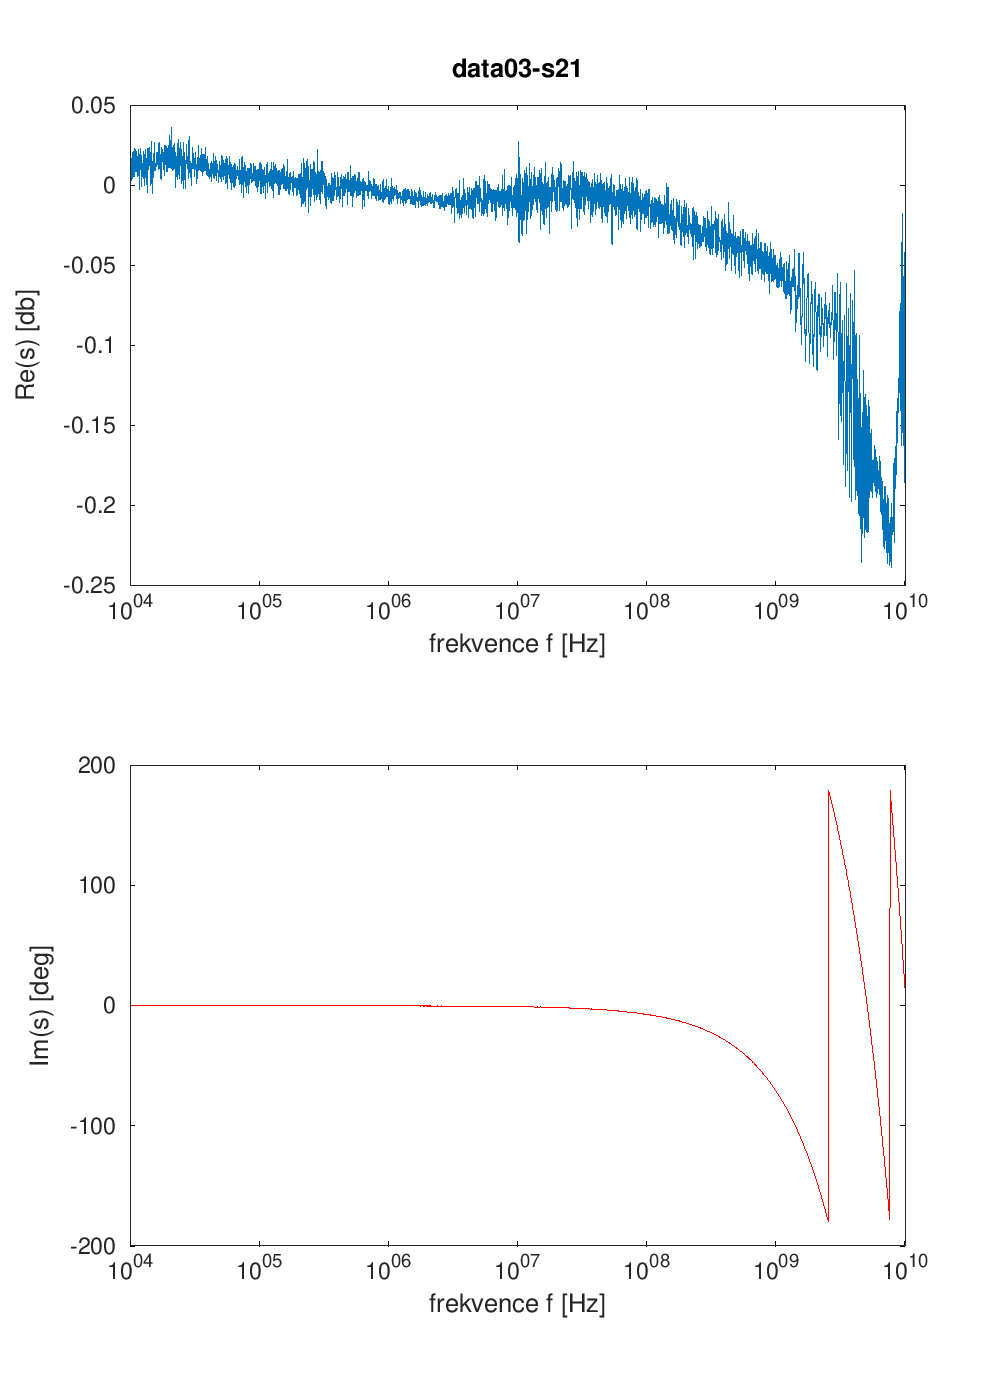

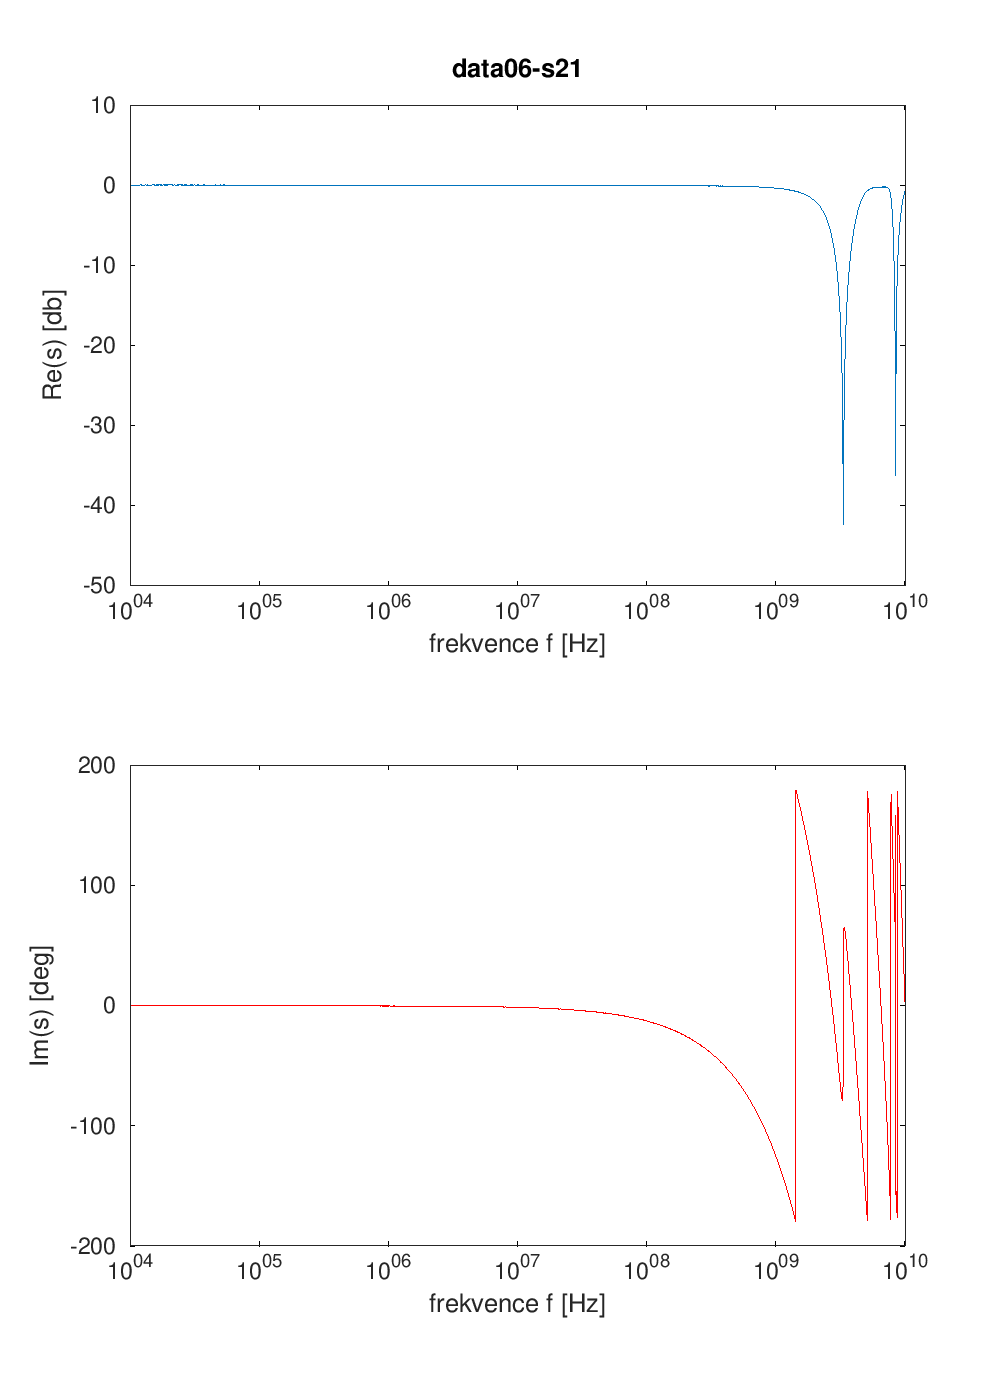

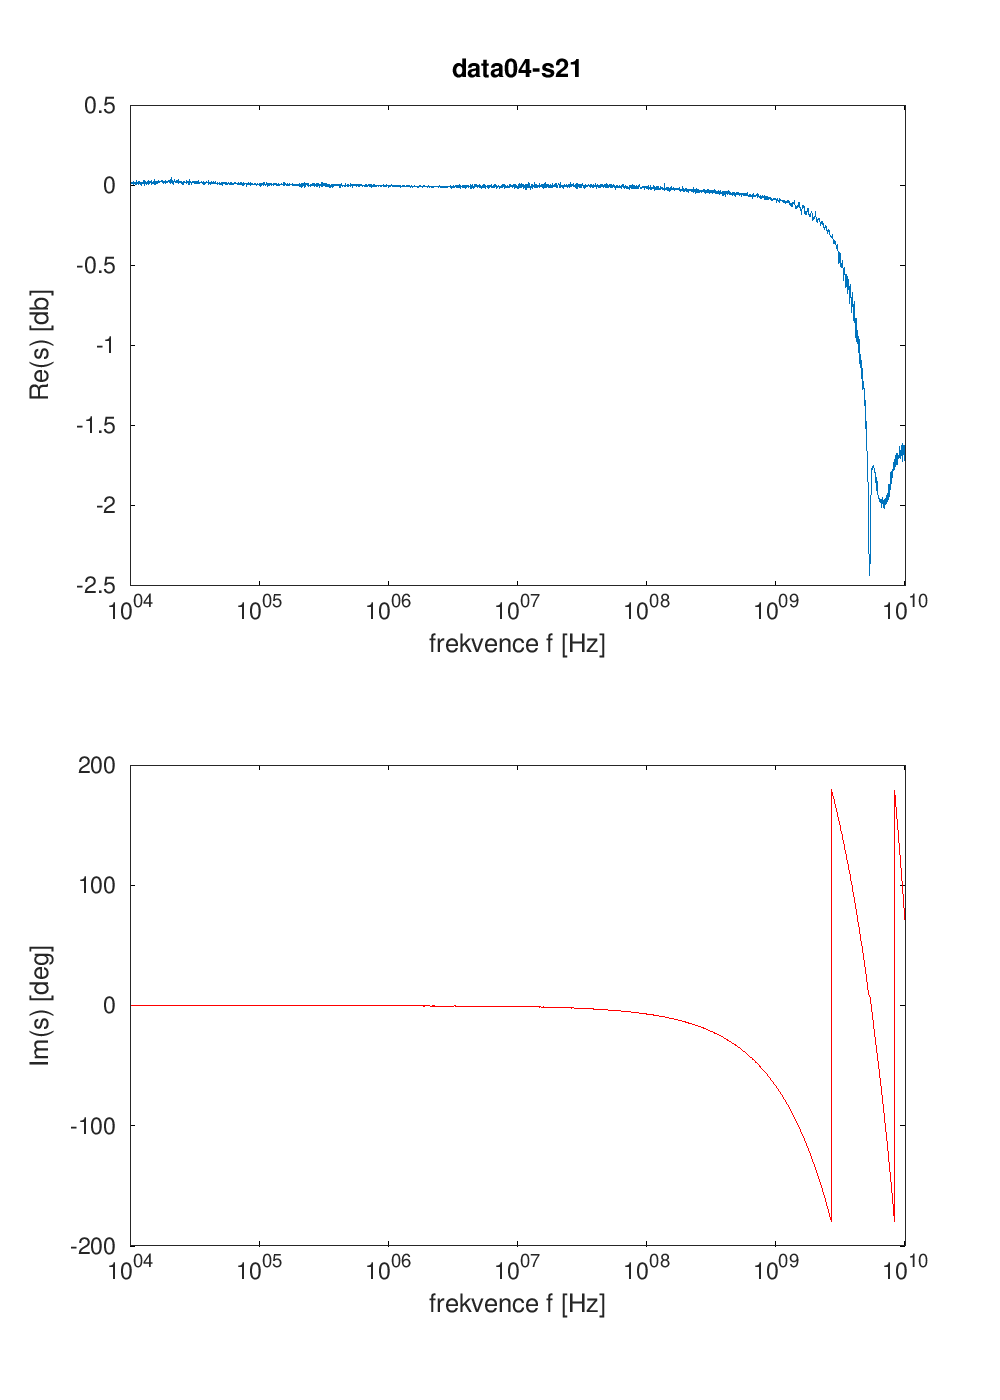

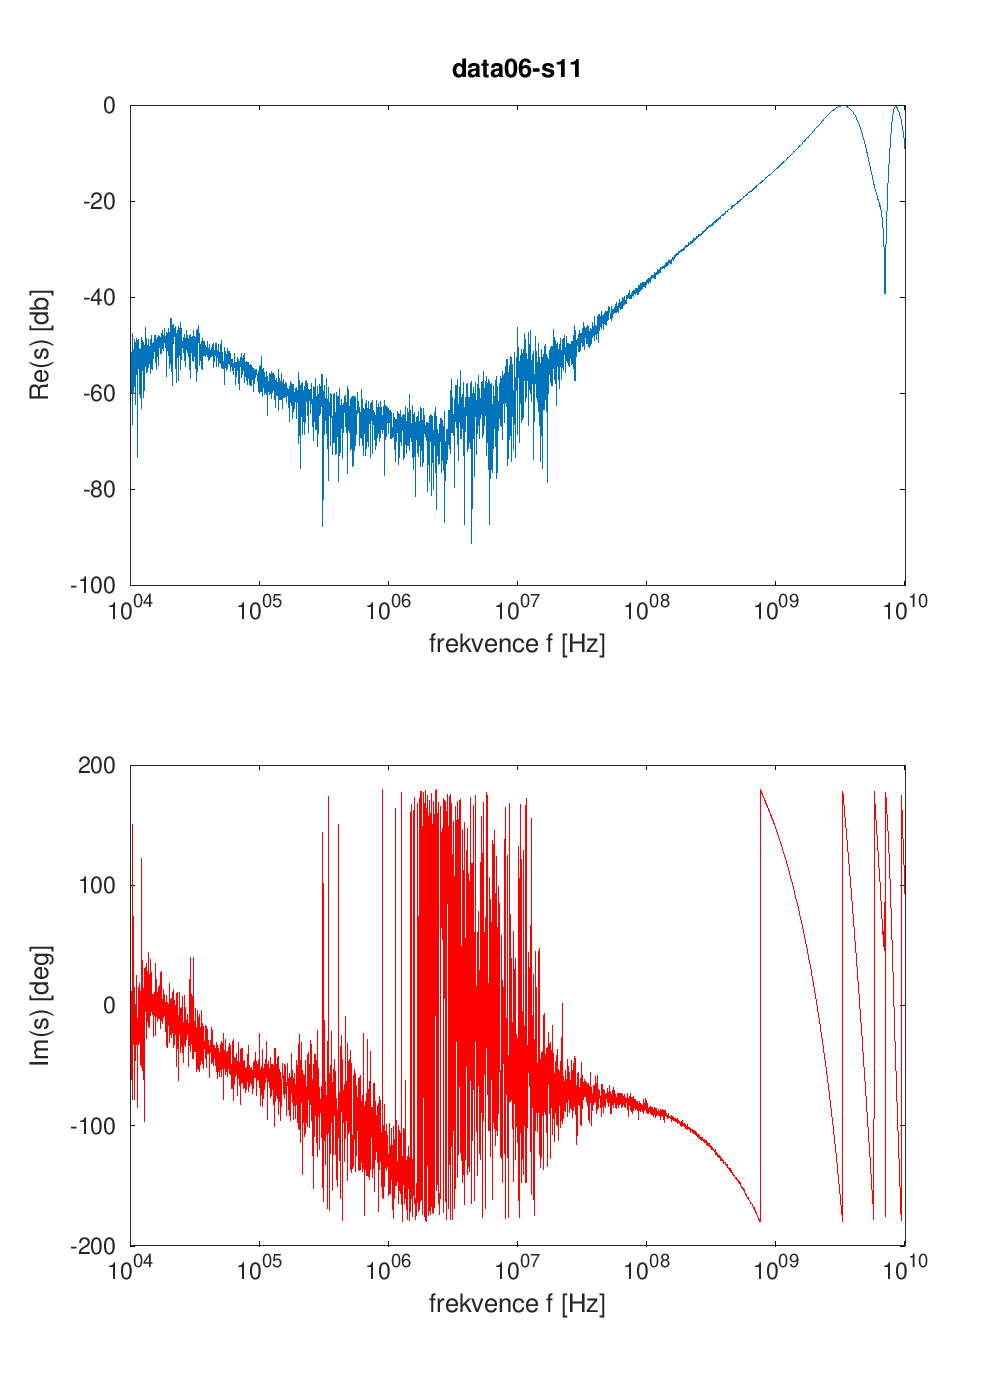

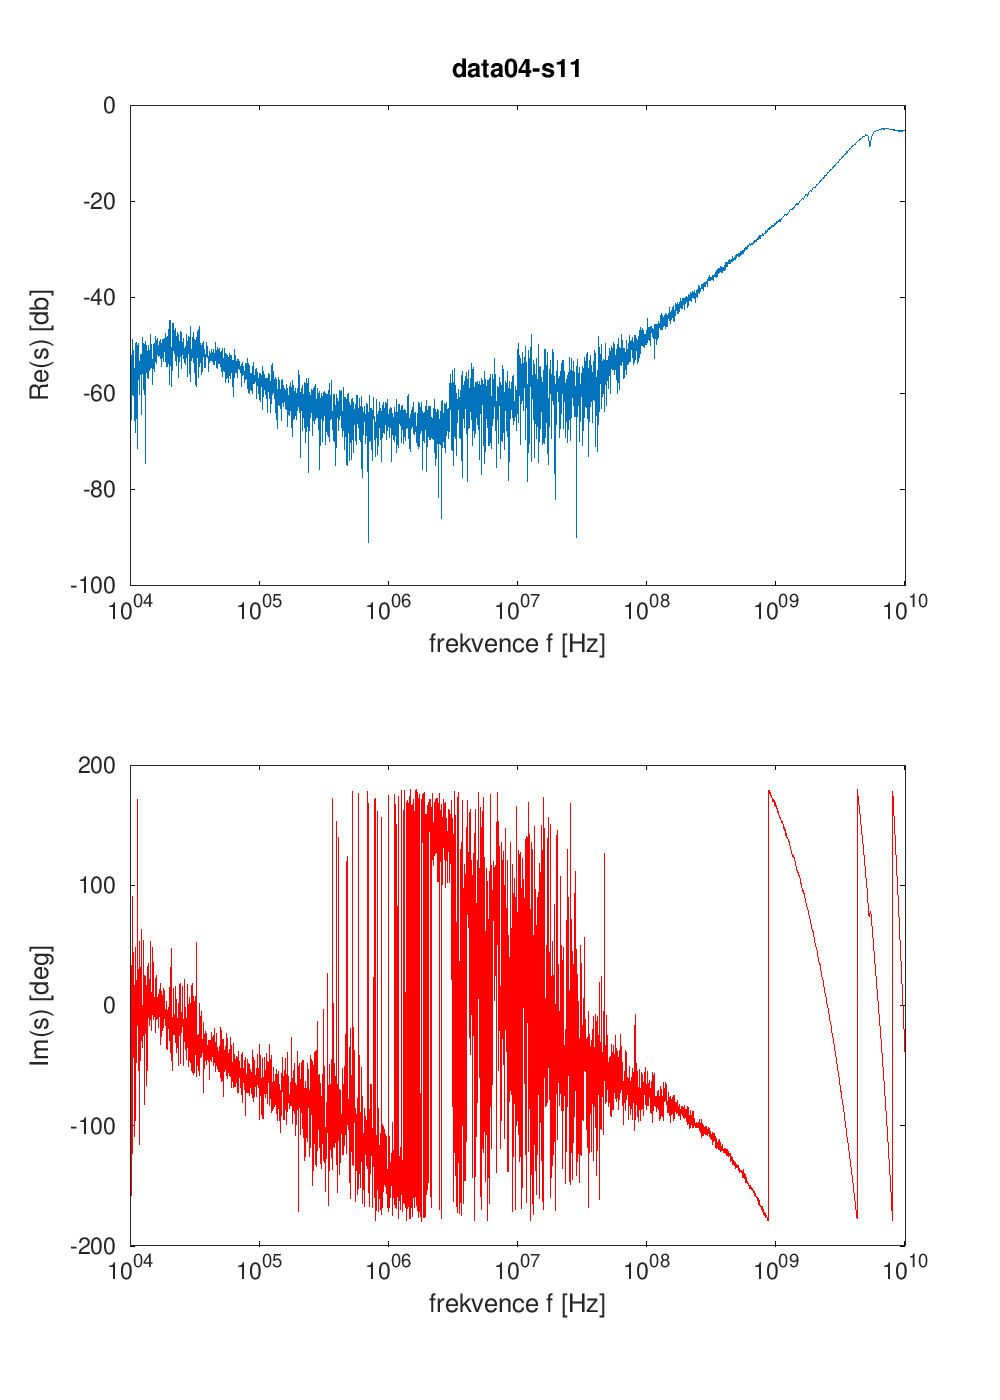

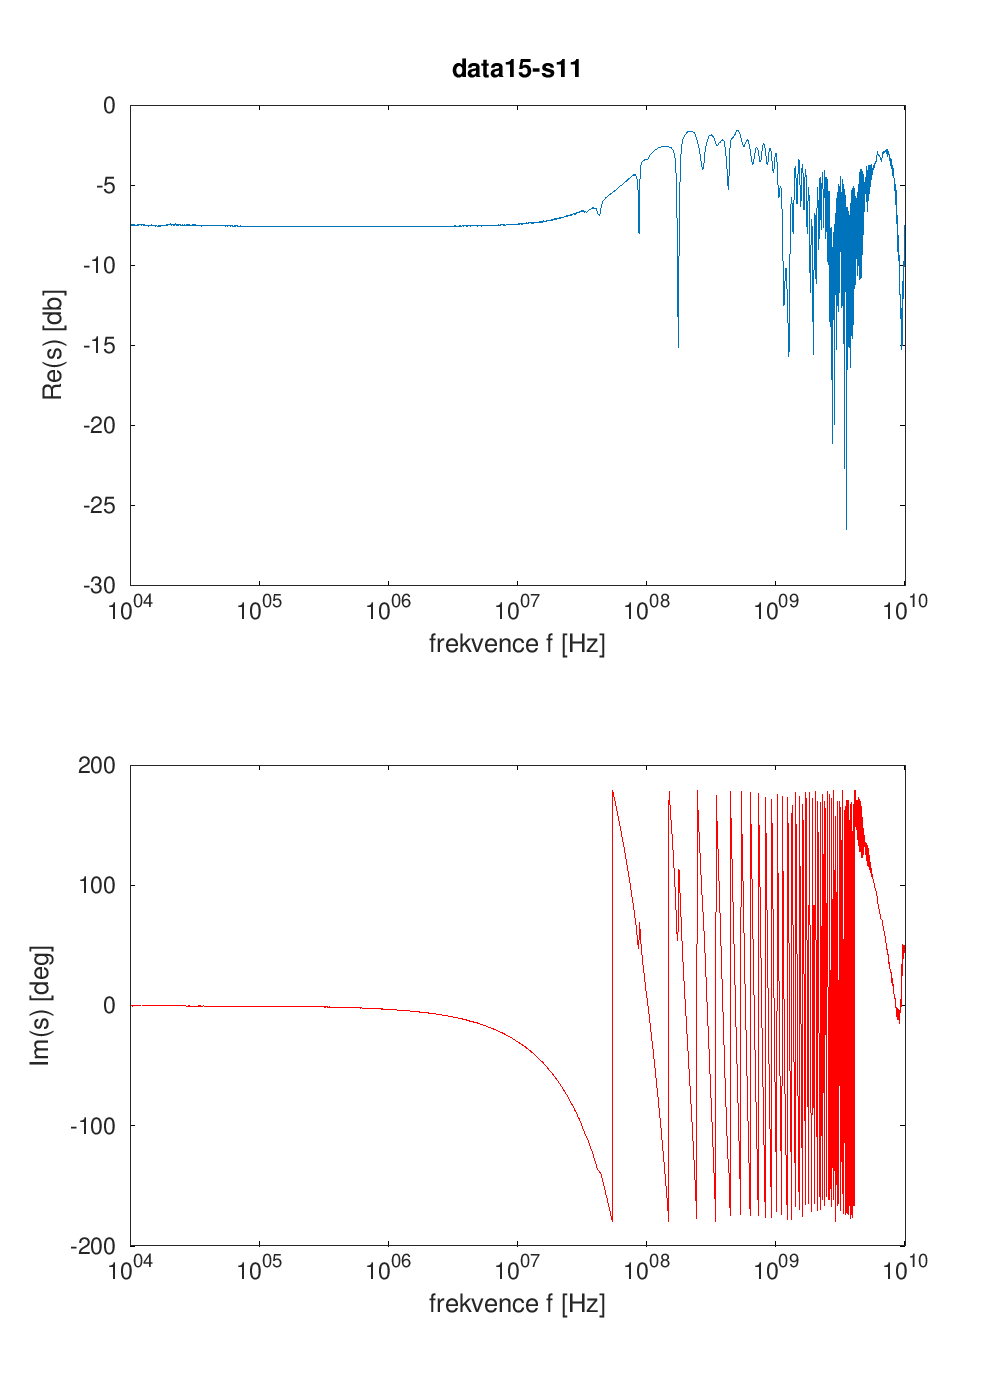

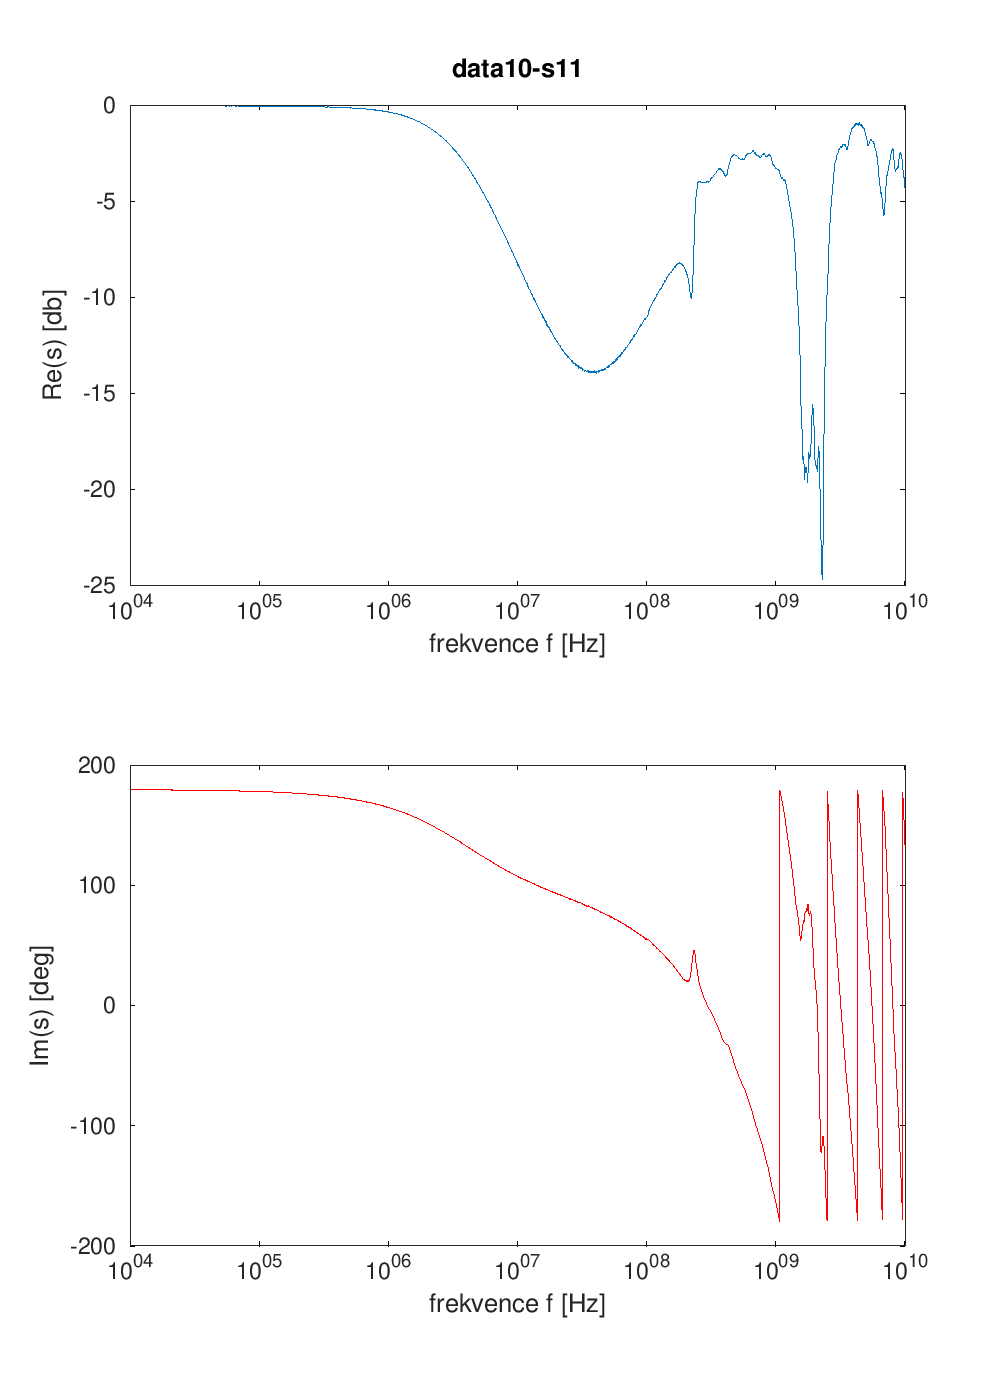

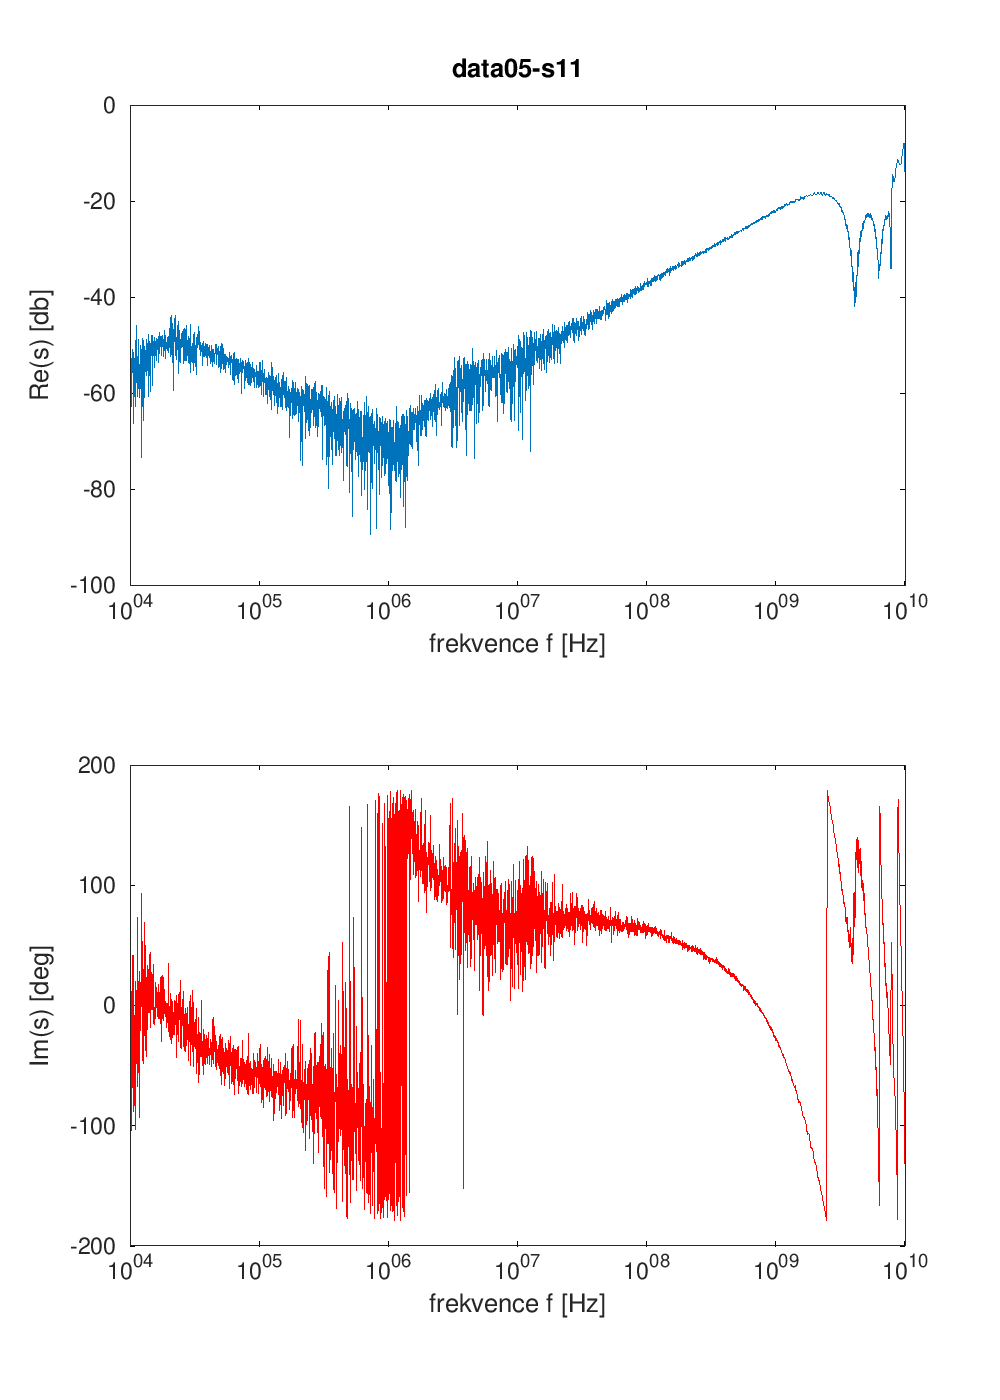

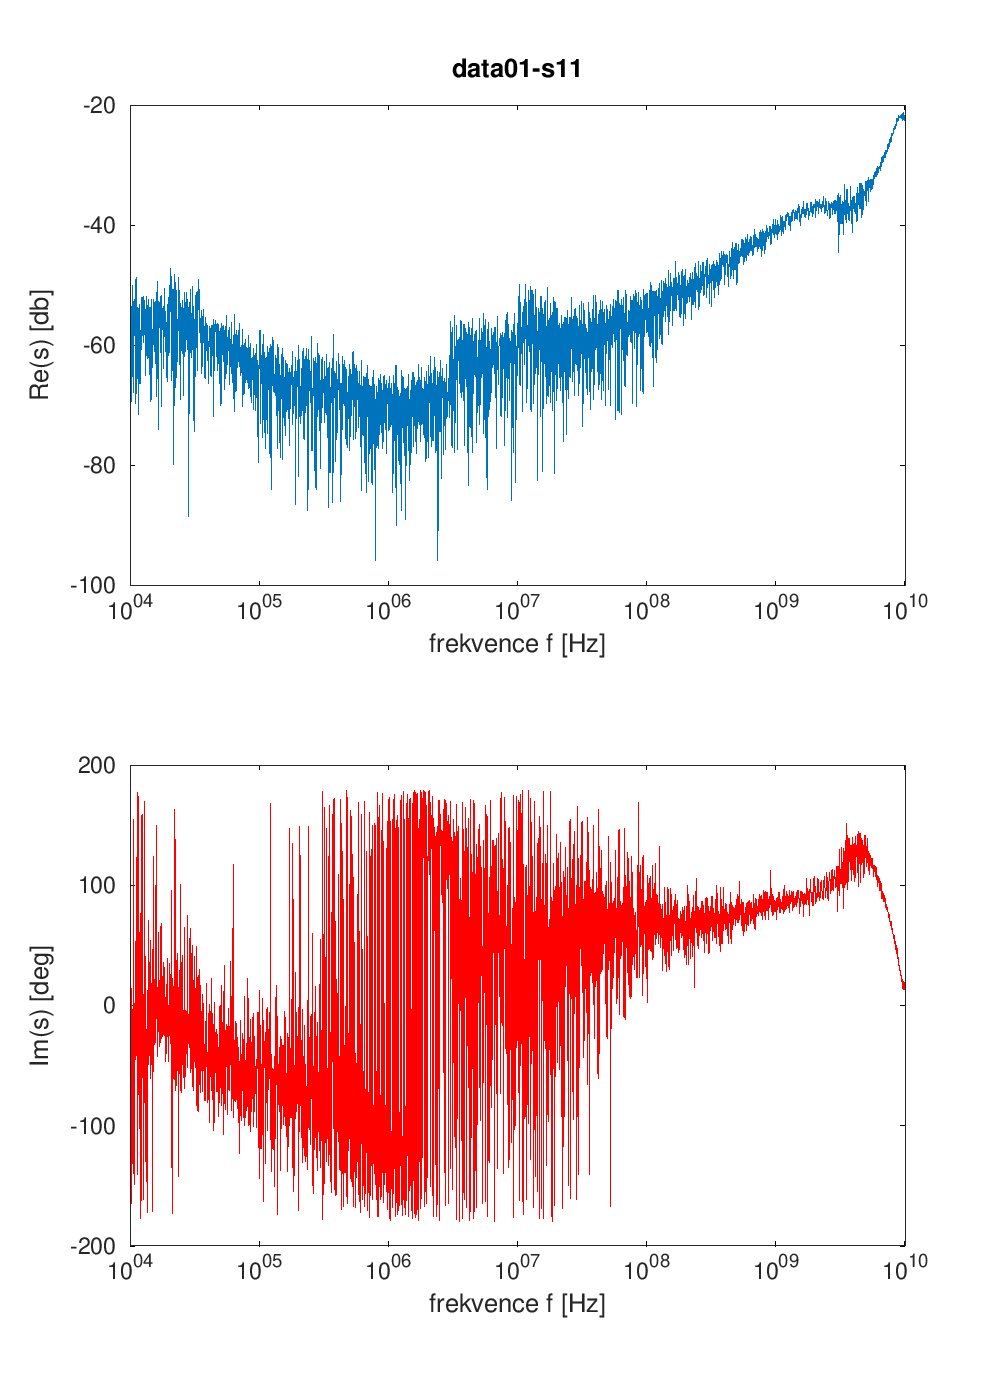

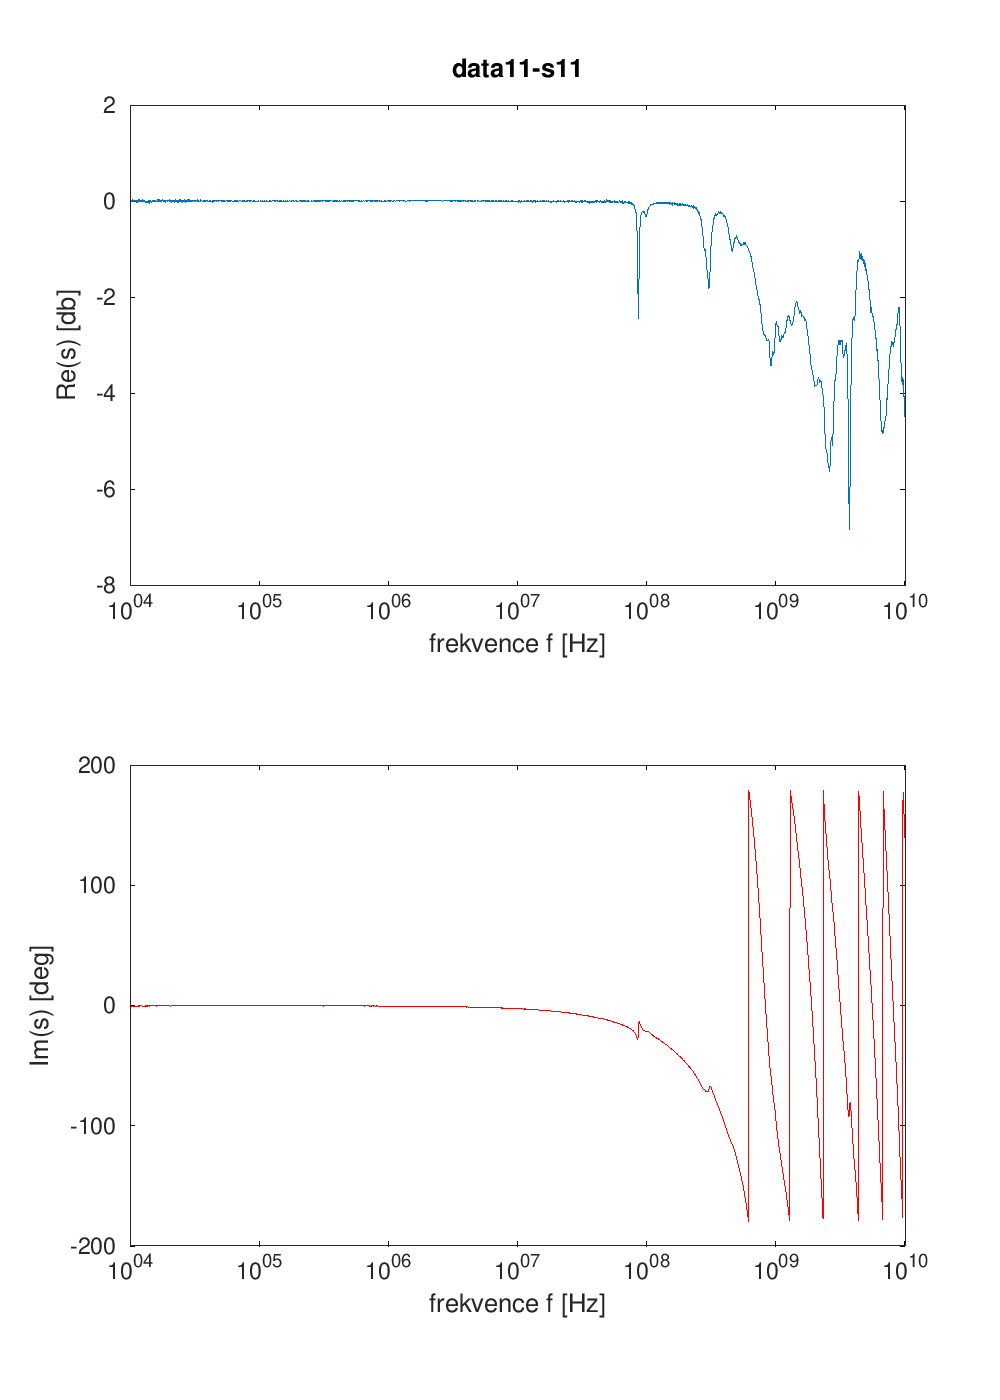

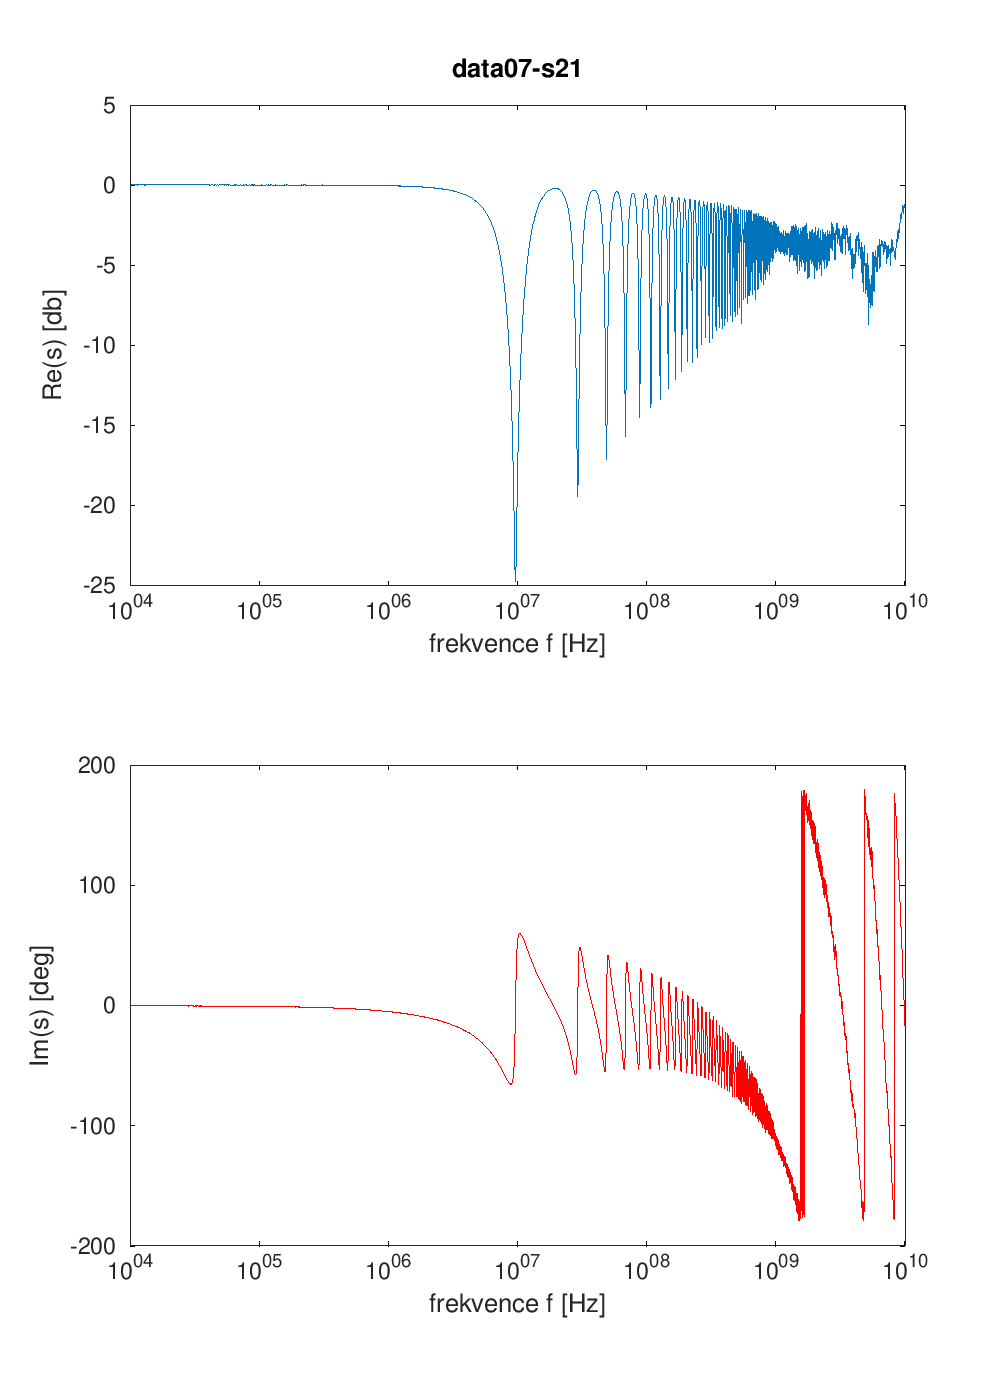

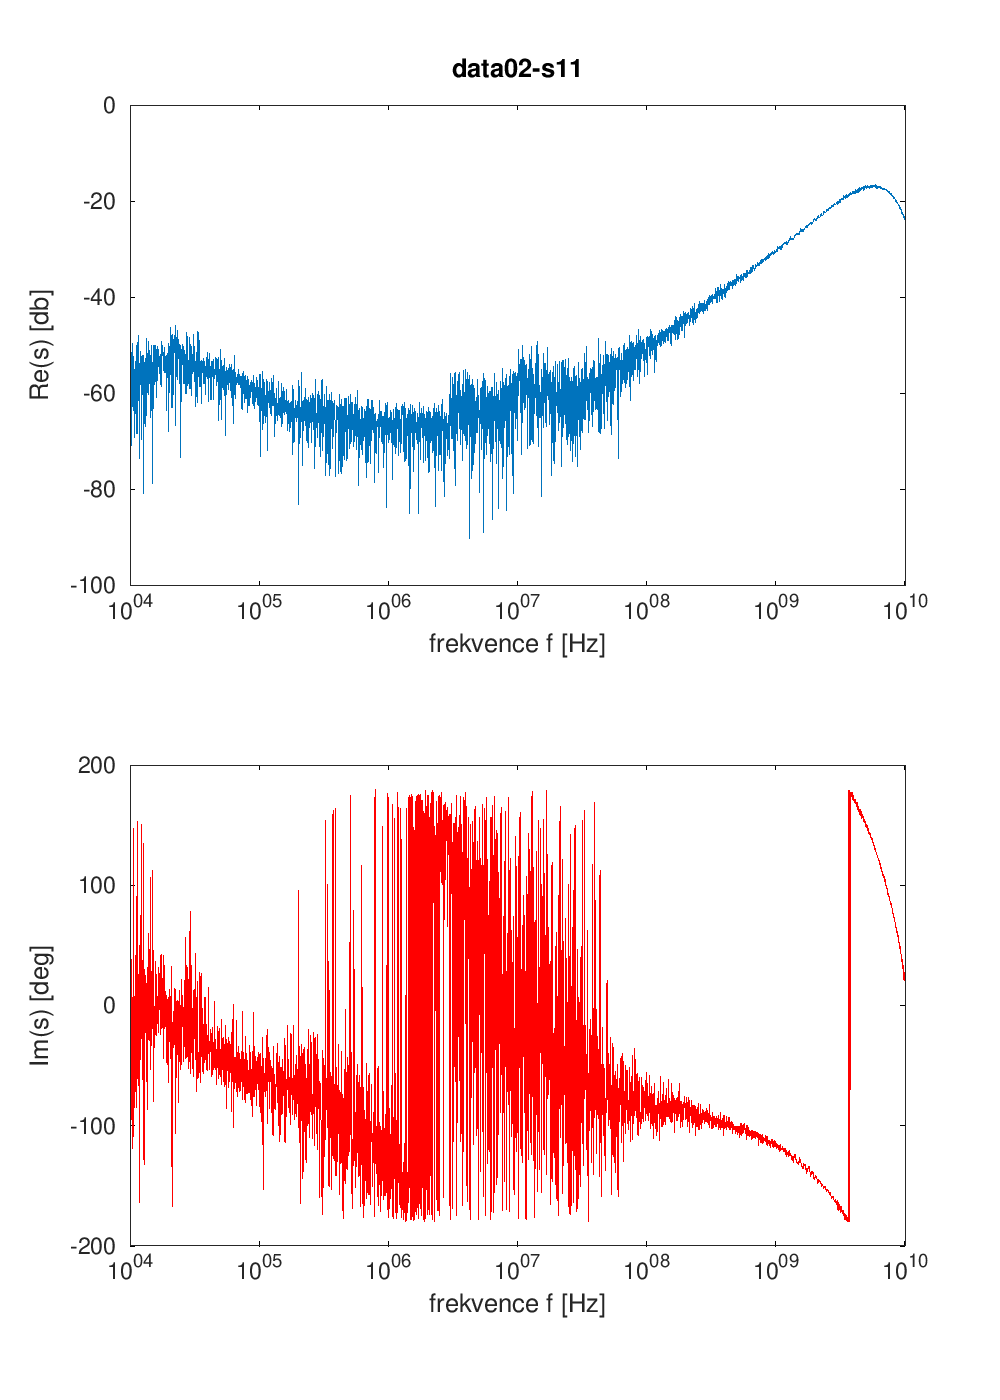

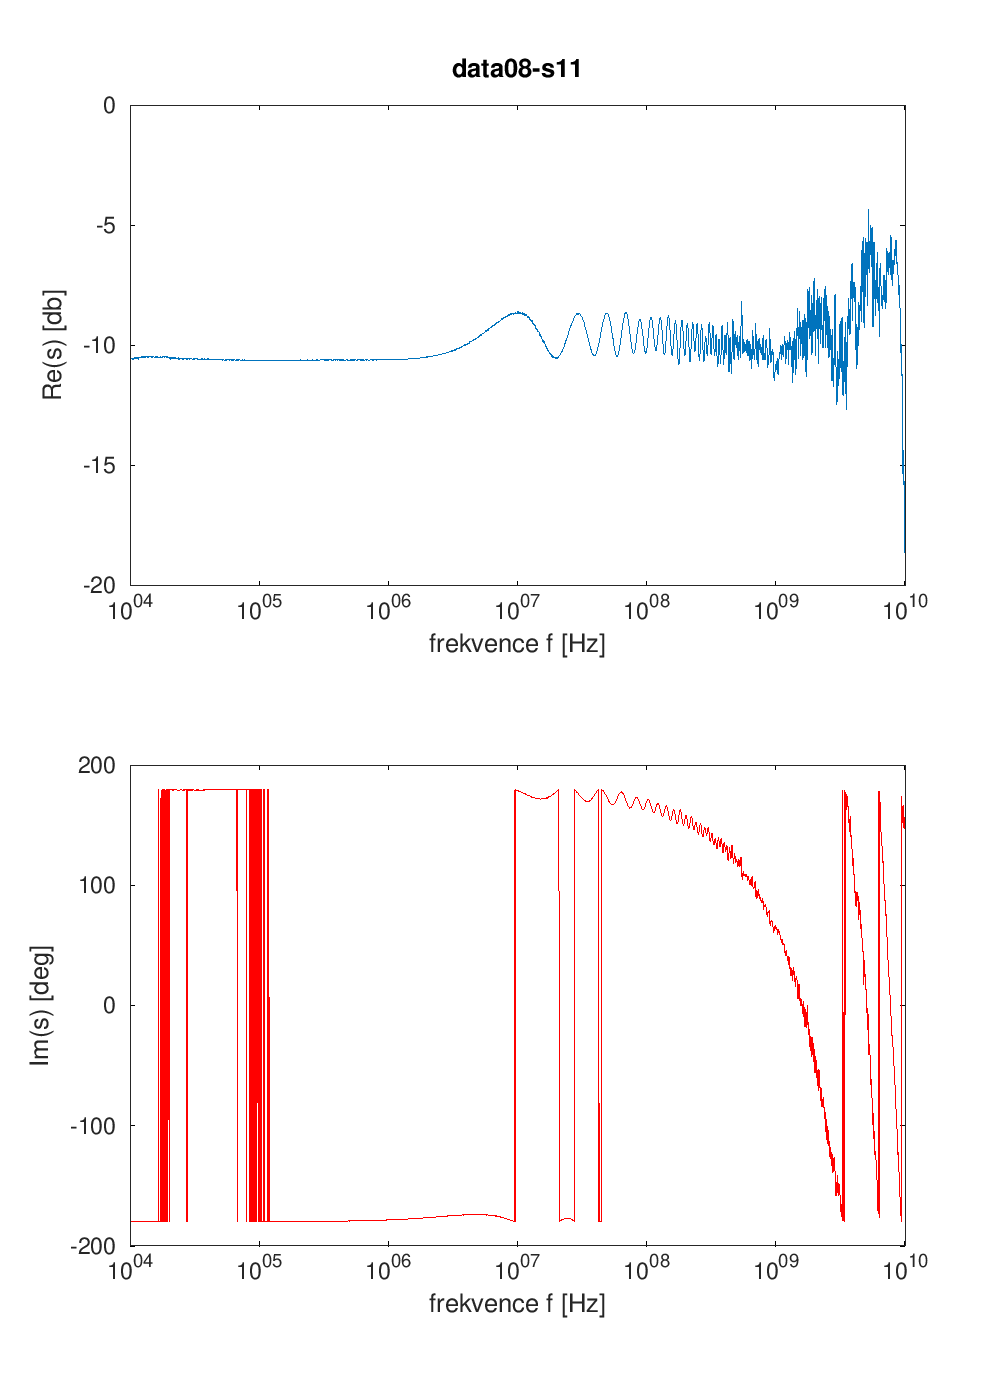

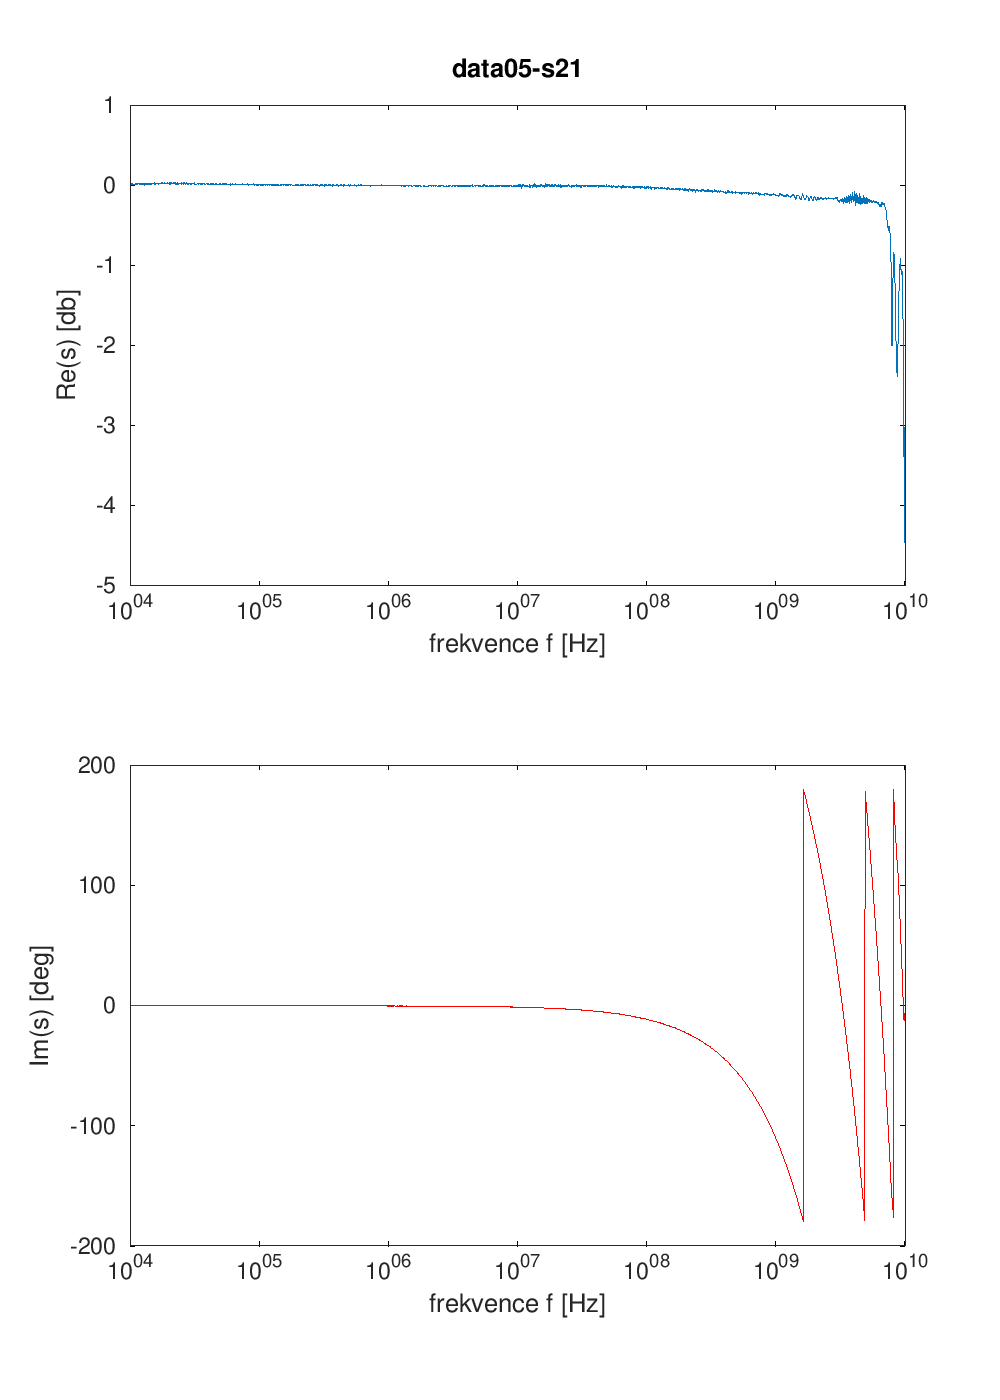

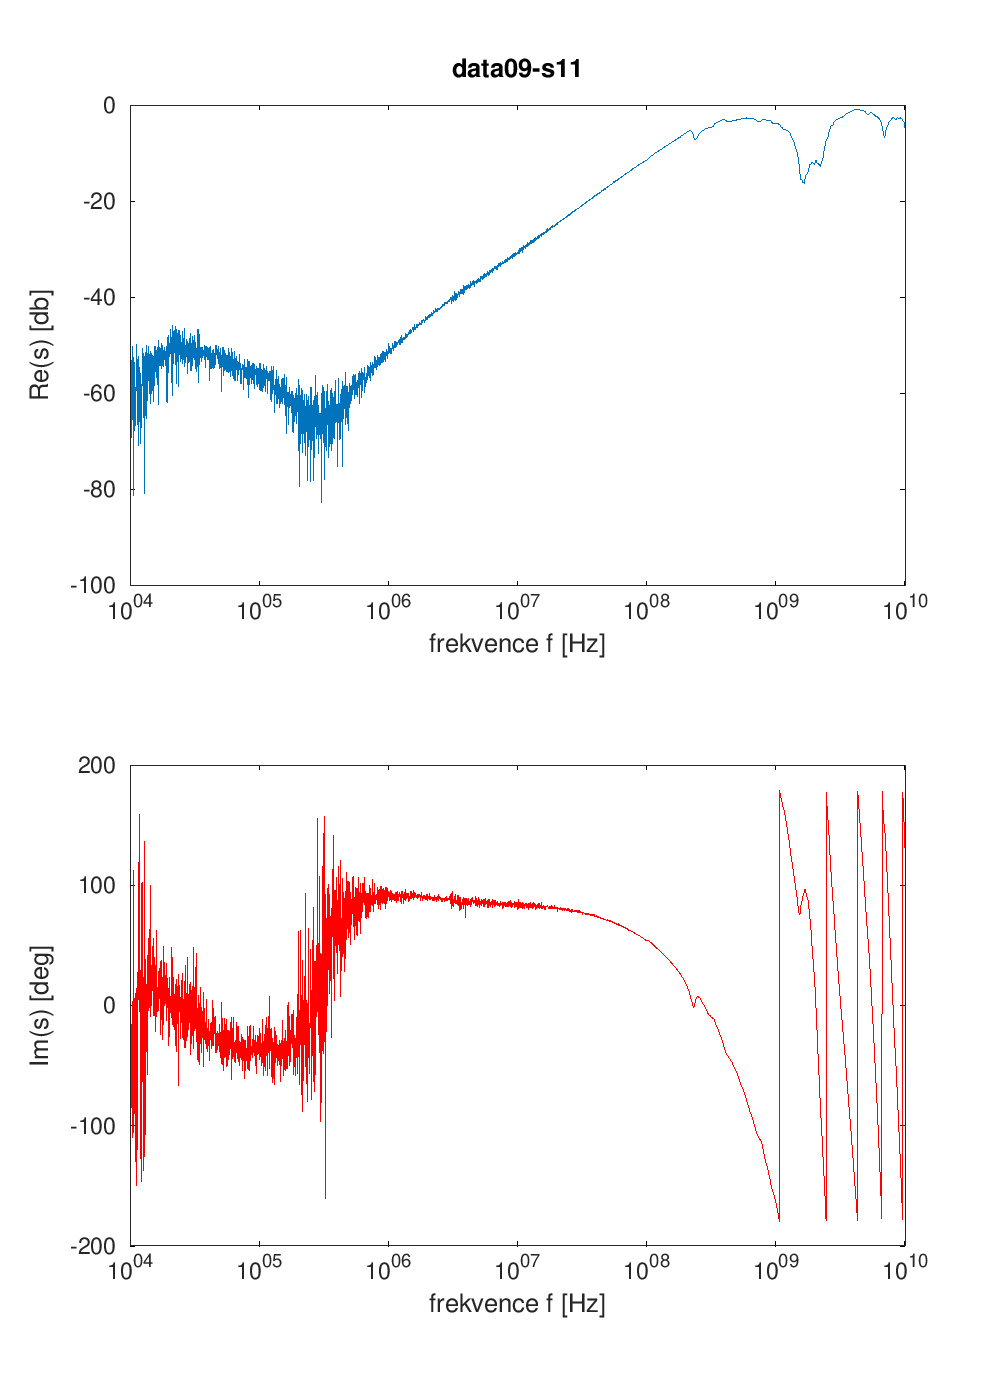

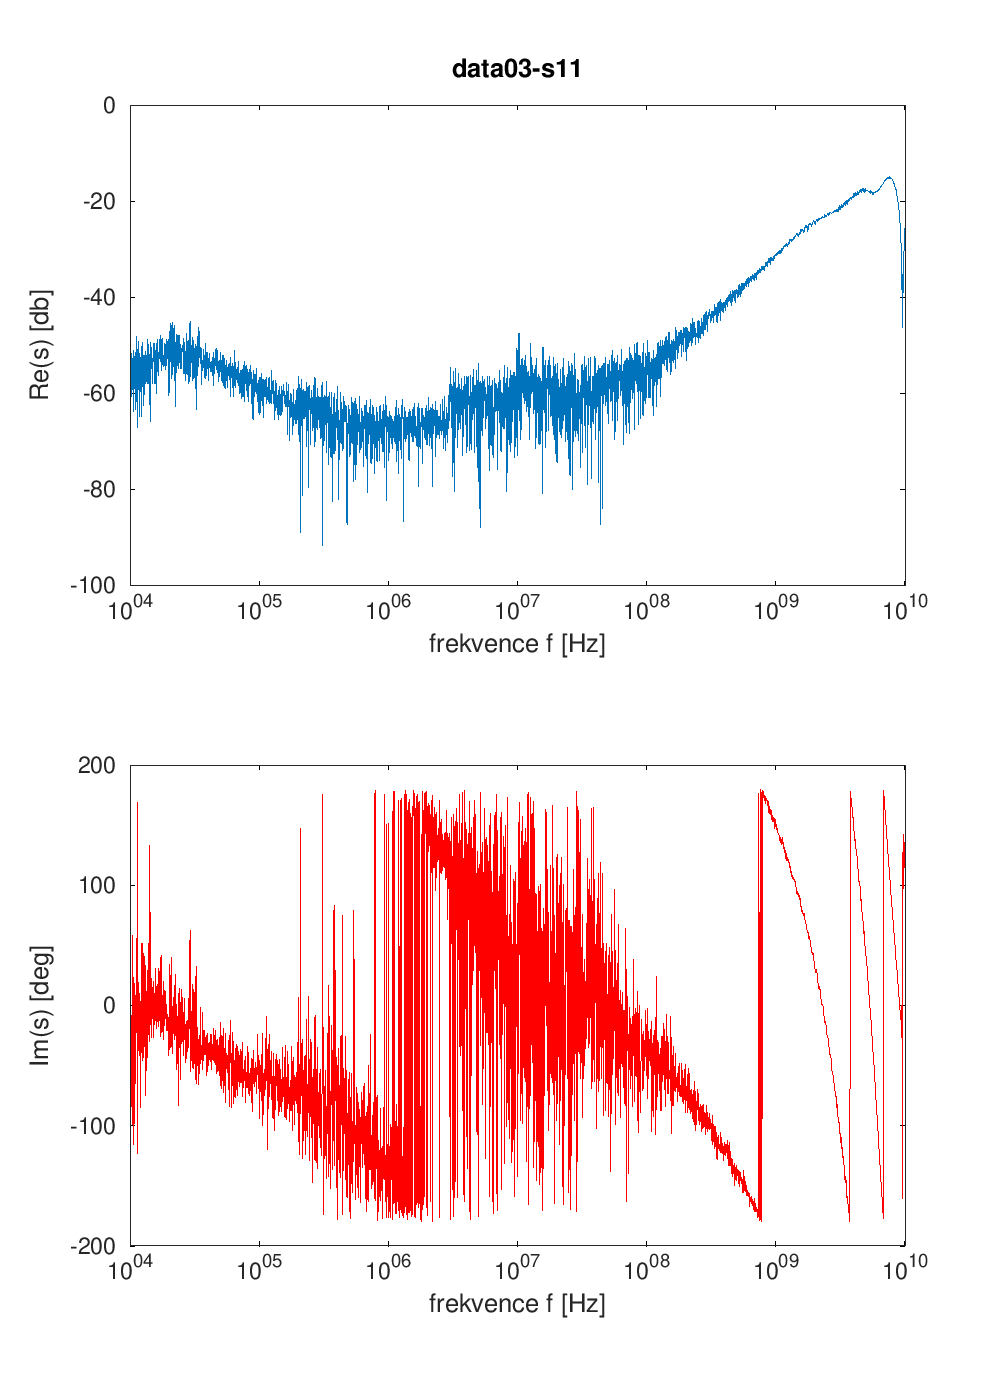

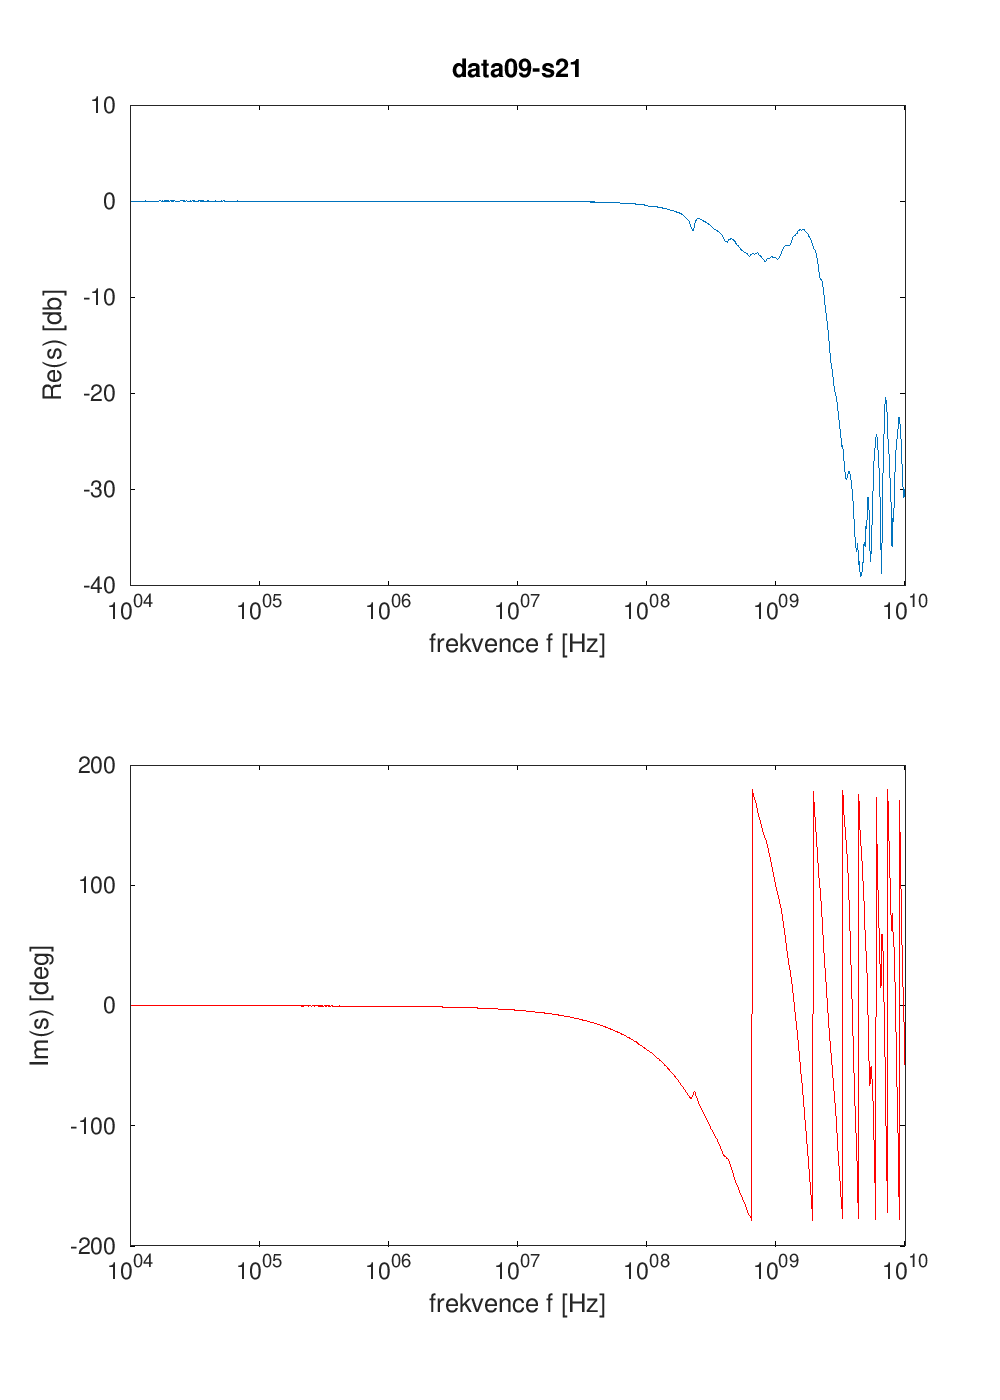

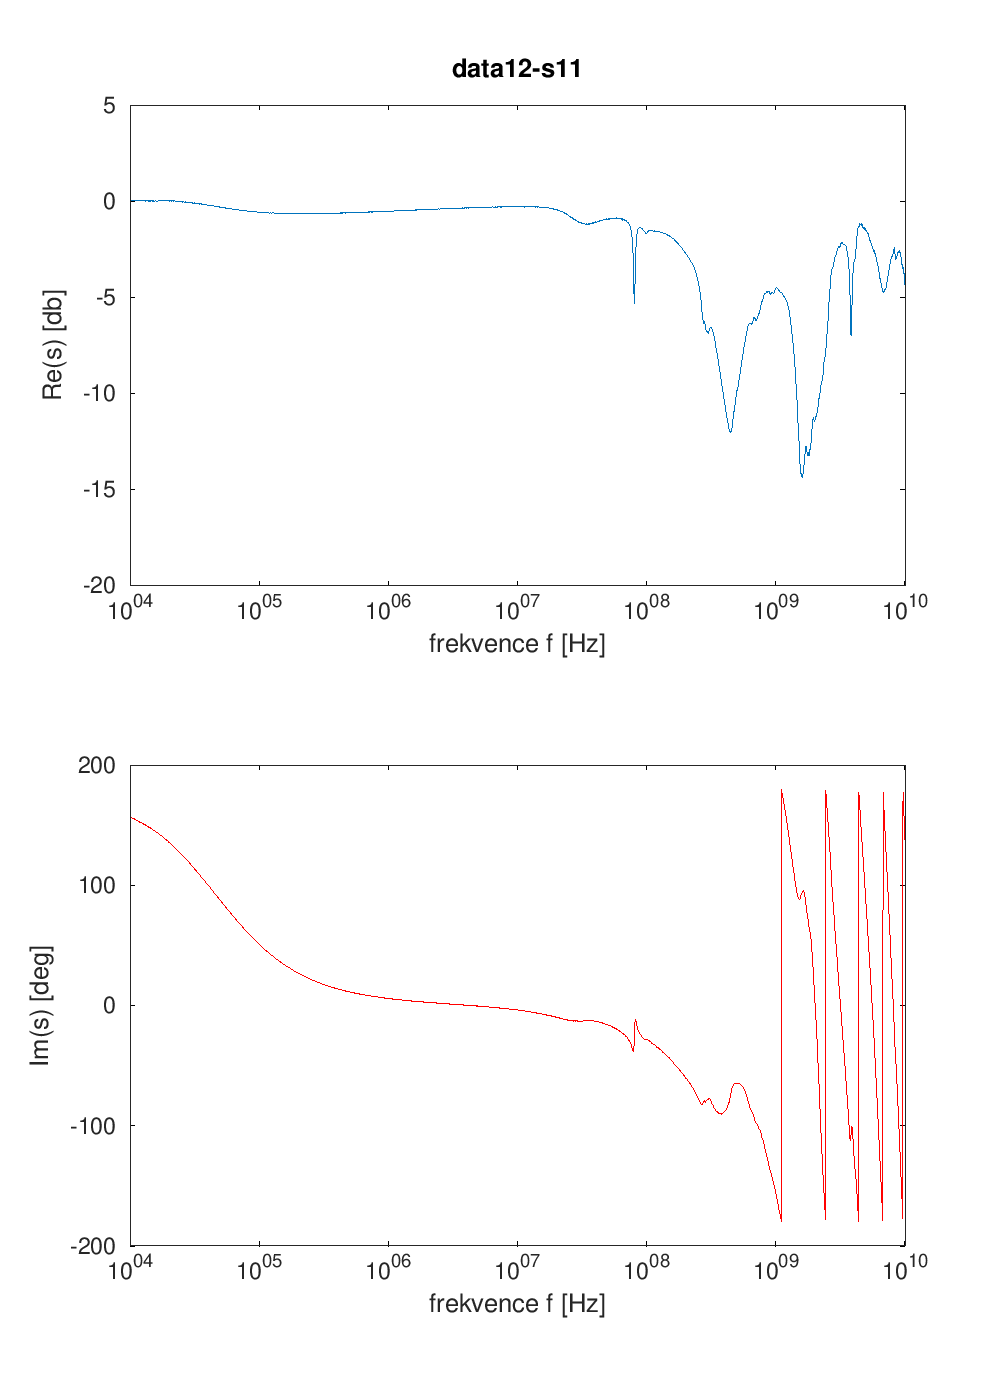

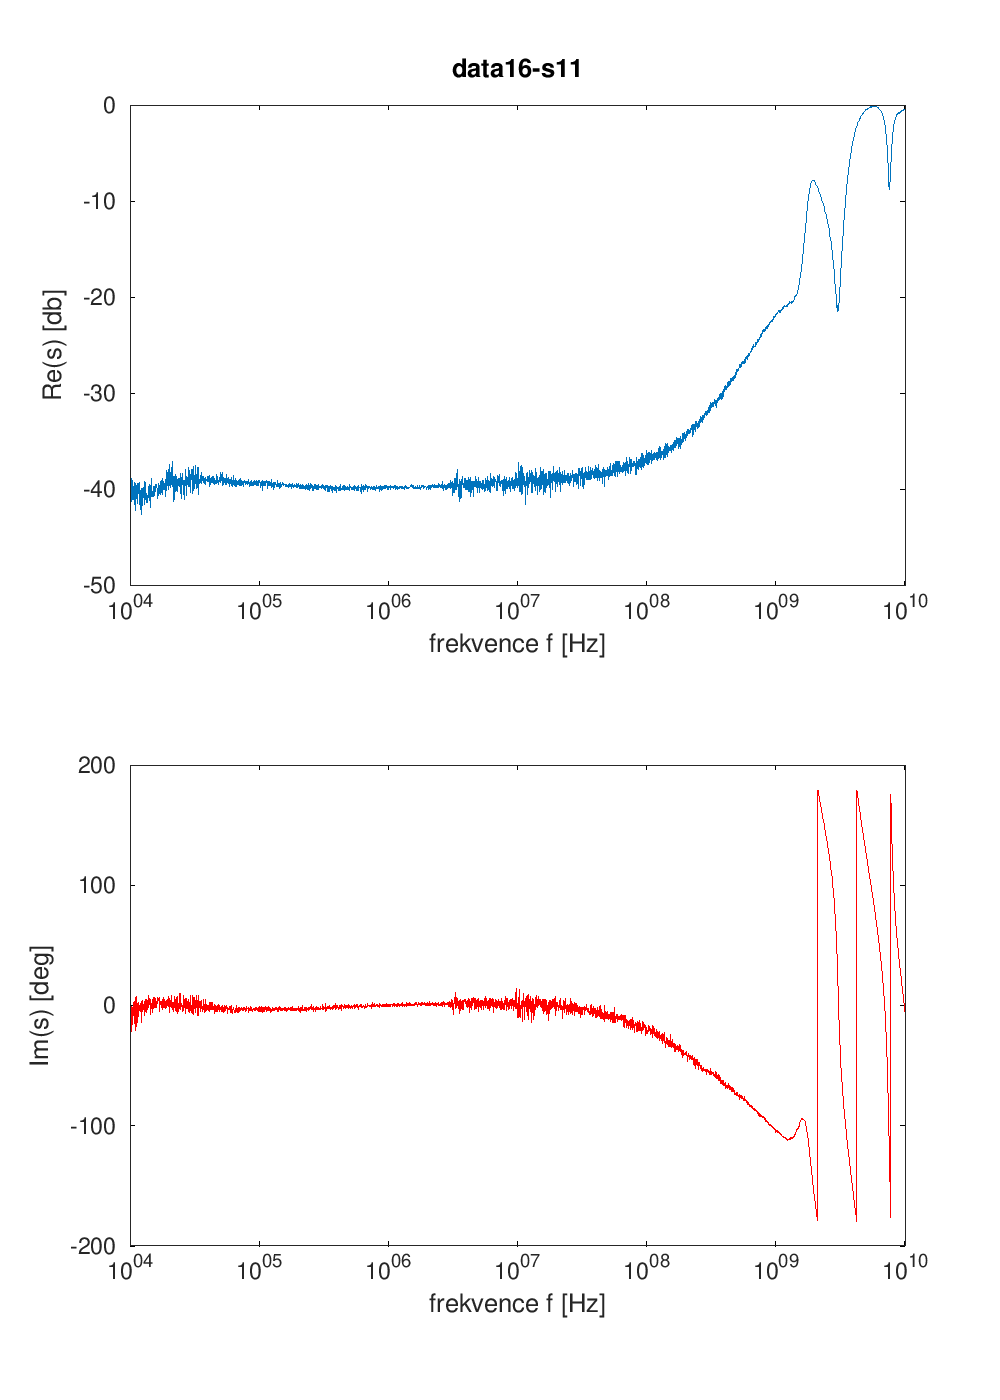

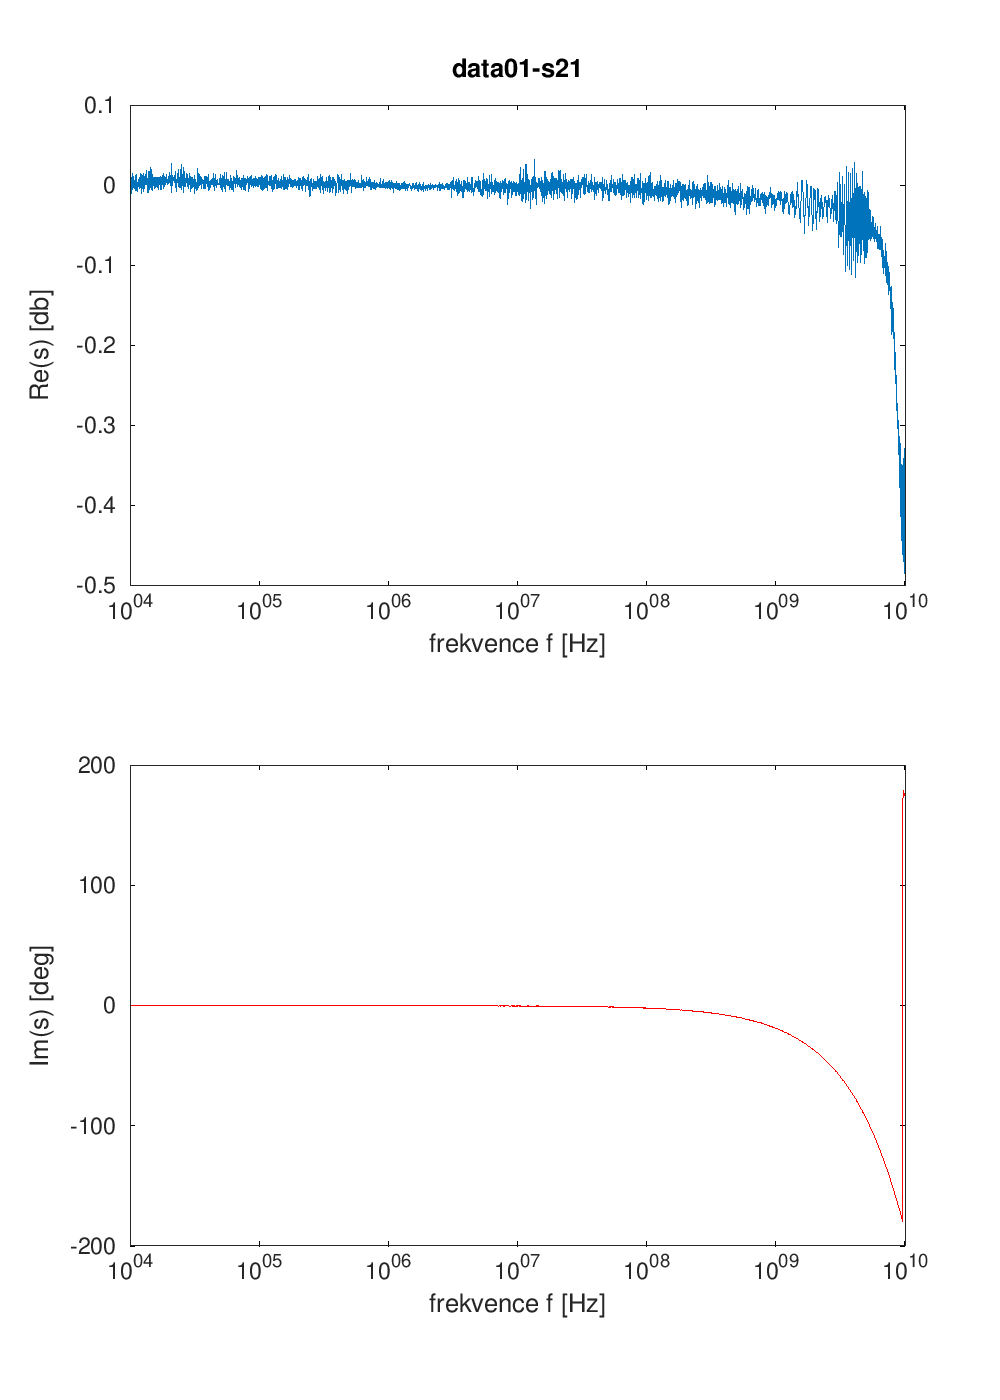

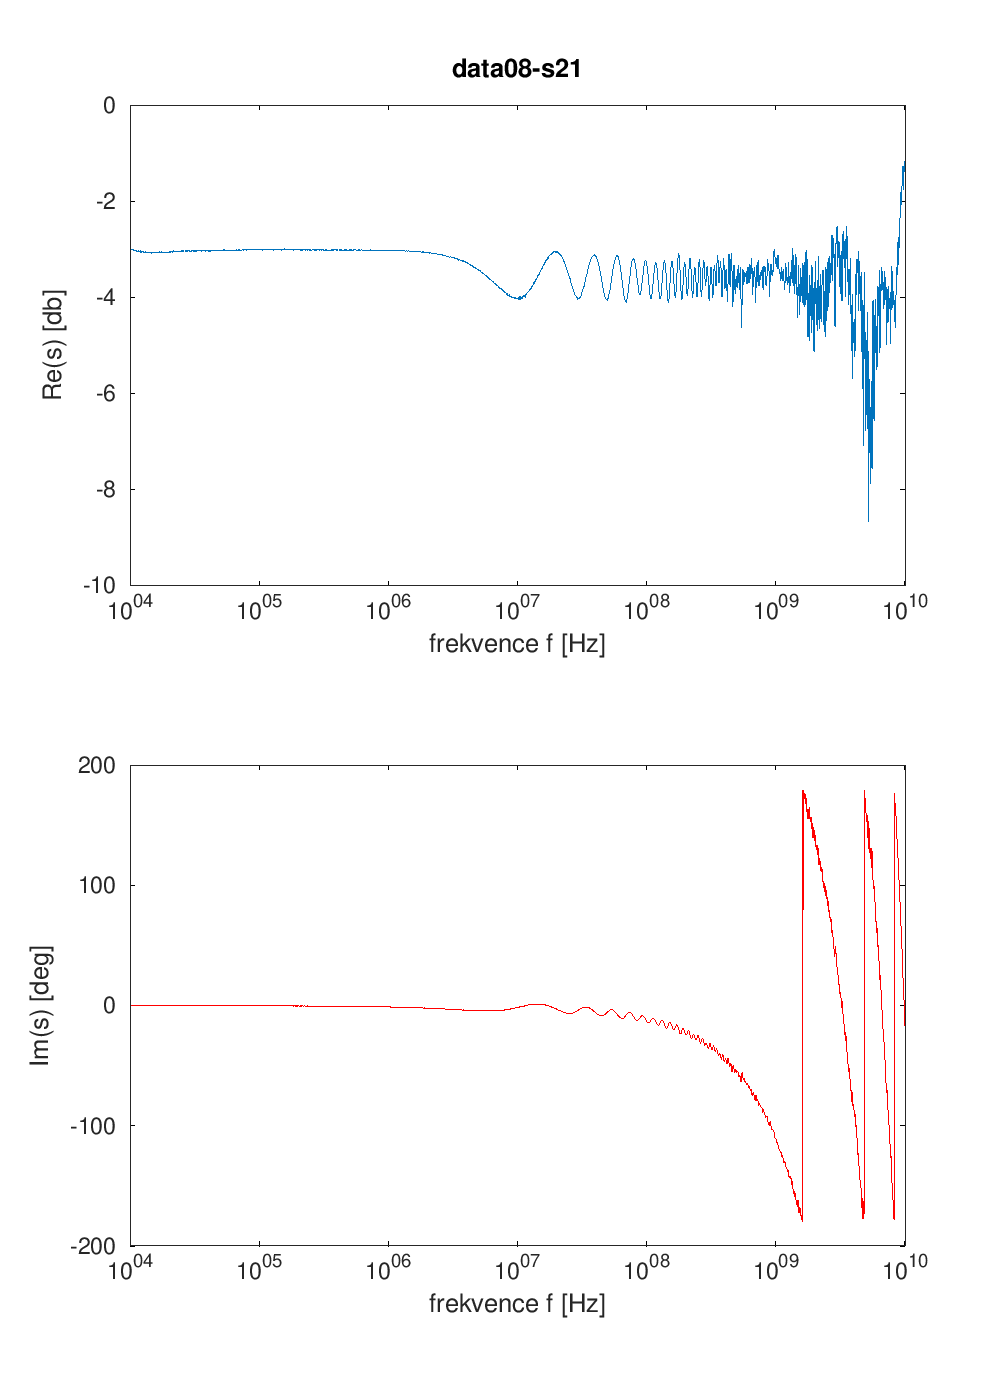

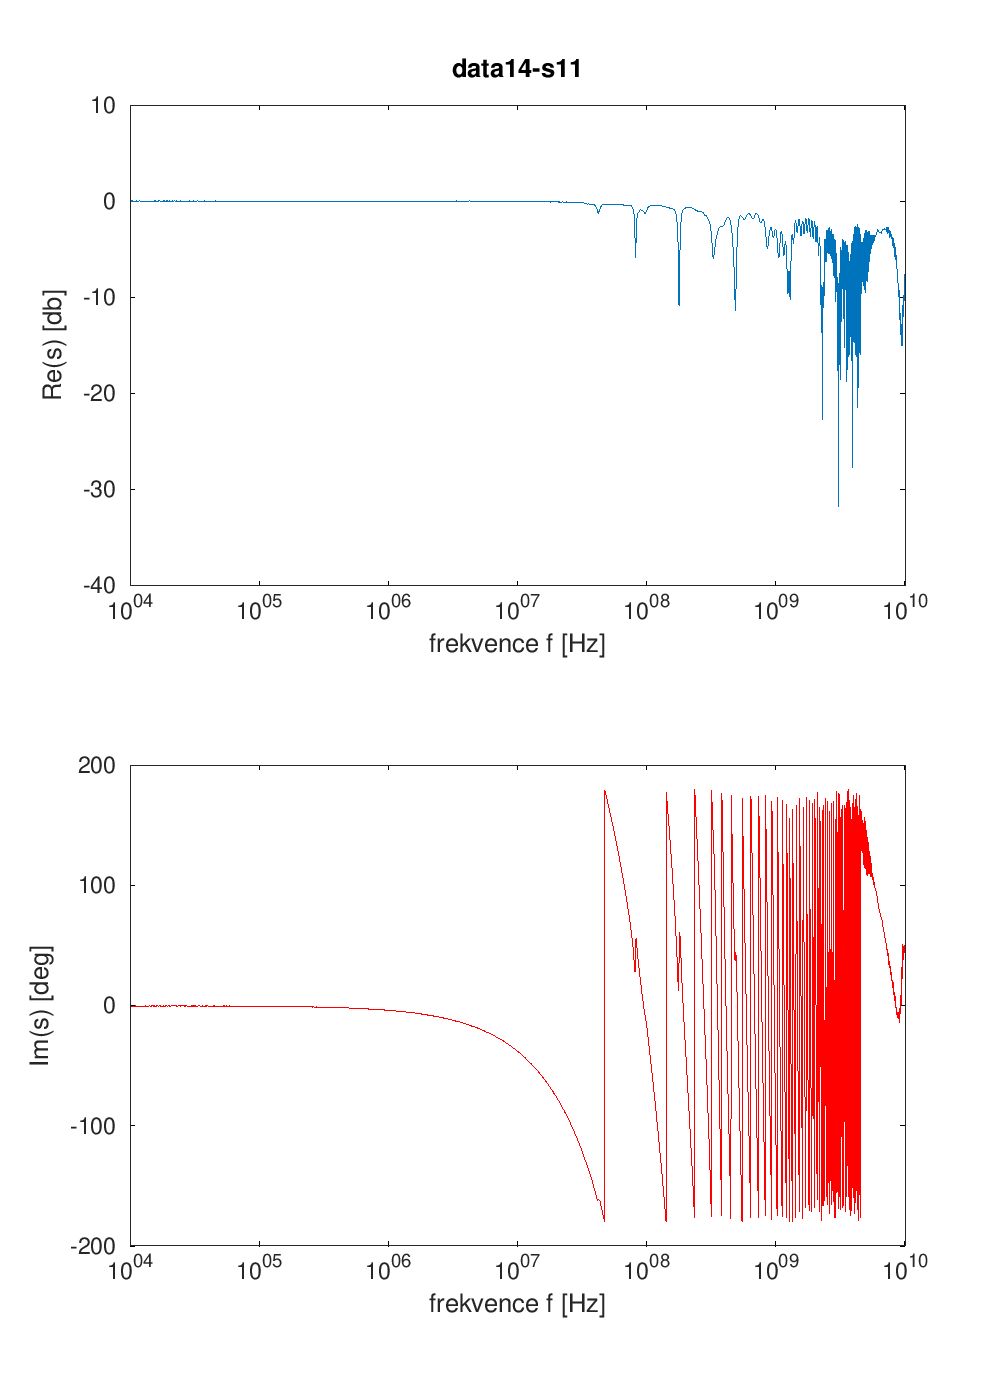

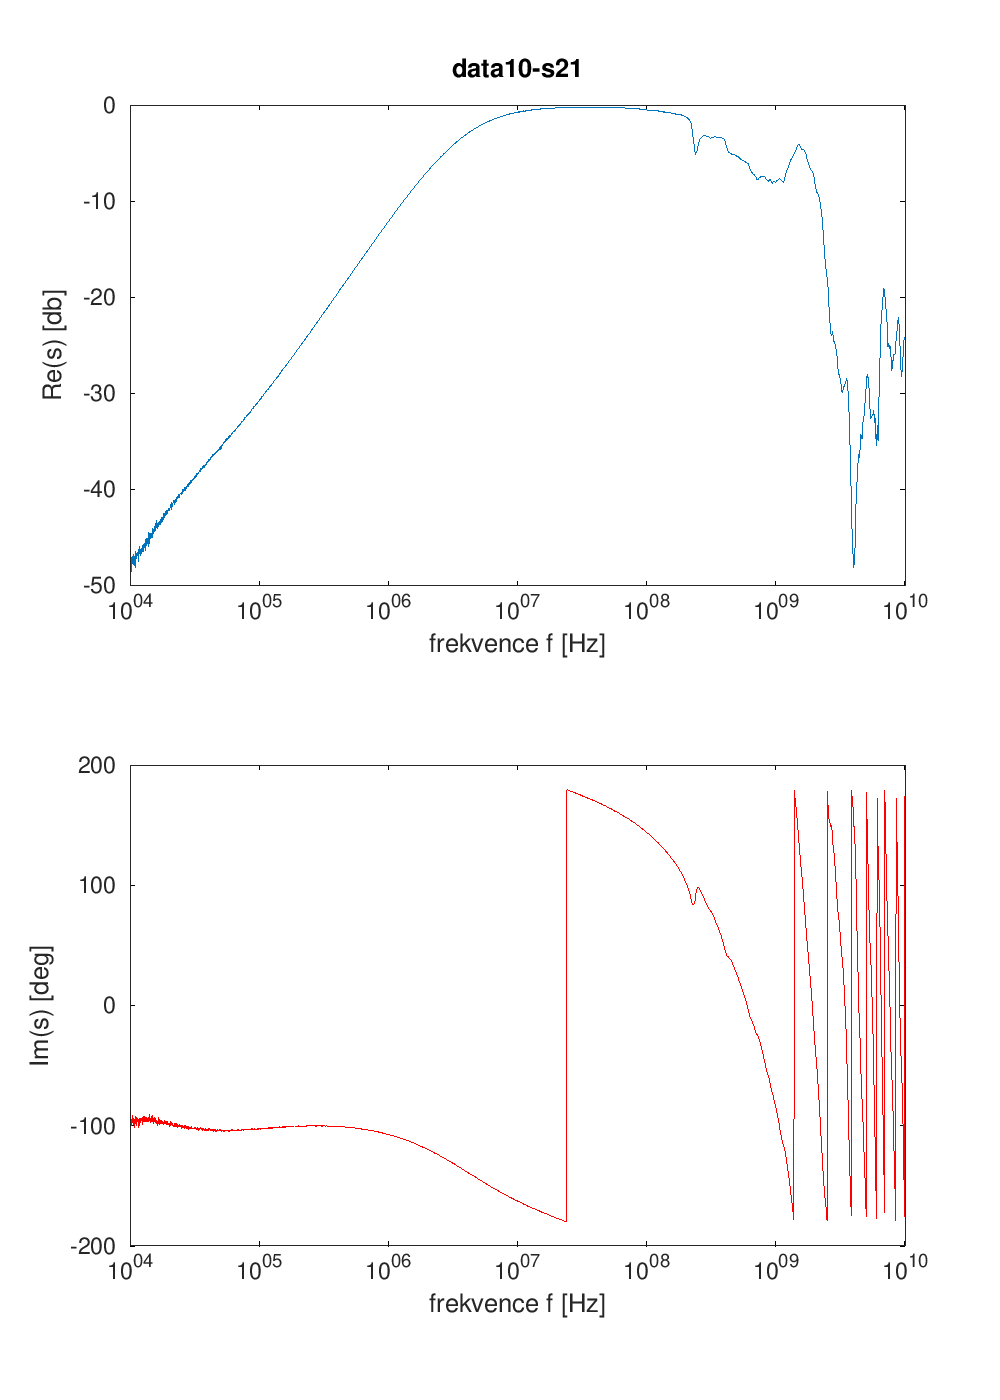

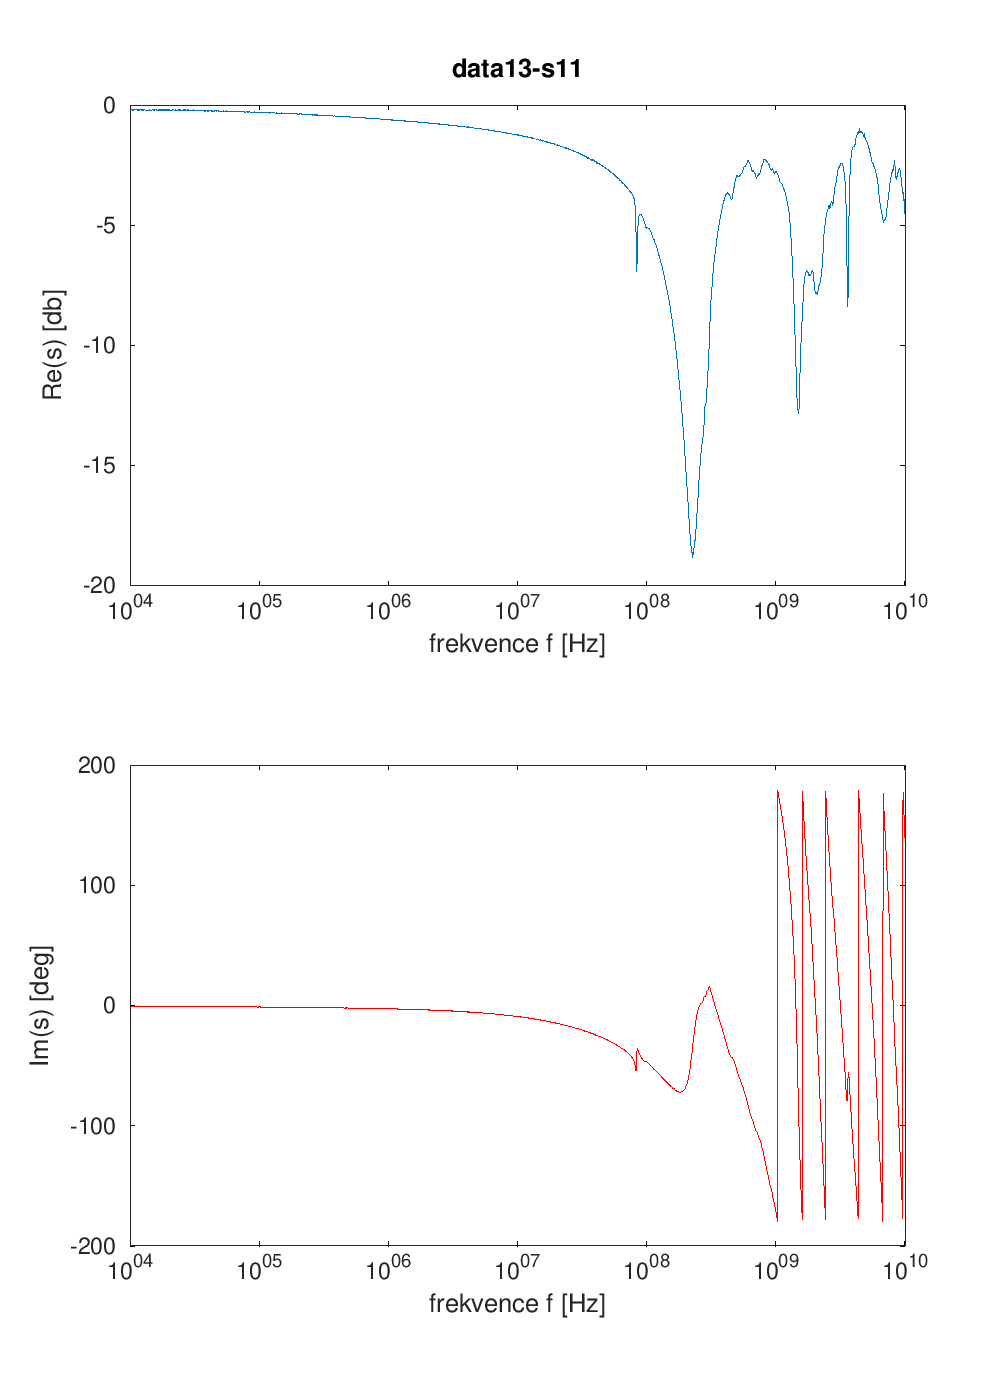

In [35]:
%plot --format png -w 1000 -h 1400

set(0, "defaultlinelinewidth", 2);

## Import the data into an array of structs called 'experiment'.
filenames = glob("data/data*.csv");
experiment = struct;
j = 1;
for file = filenames'
    file = file{1};
    idx = j++;
    data = dlmread(file, "", 3, 0);
    [~, name, ext] = fileparts(file);
    experiment(idx).name = name;
    experiment(idx).filename = [name ext];
    experiment(idx).freq = data(:,1);
    experiment(idx).s = complex(data(:,2), data(:,3));
endfor

## Plot the data for each experiment.
for e = experiment
    figure;
    subplot(2, 1, 1);
    semilogx(e.freq, real(e.s));
    title(e.name);
    xlabel("frekvence f [Hz]");
    ylabel("Re(s) [db]");
    subplot(2, 1, 2);
    semilogx(e.freq, imag(e.s), "r");
    xlabel("frekvence f [Hz]");
    ylabel("Im(s) [deg]");
endfor